# DSC540 Project 2

DePaul University  
Ilyas Ustun, PhD  
Chicago, IL  

## Rules
- Do not change the code already present in the notebook.
- Write your code under the corresponding questions where you see `# Code here`. You are encouraged to use more than one cell.
- Provide explanation in a separate Markdown formatted cell. 
- You can change the cell type by:
    - Clicking on the outer area of the cell type you want to change,
    - Go to the top, and select either Code or Markdown from the dropdown menu.
- Be concise in your explanations and conclusions.
- Write clear code and provide explanation to functions you create by using `#` comment sign.
- For built-in function and methods you use from libraries, provide a very brief explanation of what they do.
- Try to answer the questions by yourself. Use documentation from pandas, sklearn and similar libraries to solve the problem.
- If you are stuck you can use different resources. Do not find an identical project and copy paste the solutions. 
- Write your name before beginning to code.


Important:  
- **Do NOT share the solutions with other people.**
- **Do NOT share the solutions on the internet including but not limited to Github and other platforms.**
- Sign the Honor Pledge below indicating that you have agreed to these rules listed here, and any other ethical and honor rules as required by the university.



- **Deliverables:**
    1. The Python Jupyter notebook file named properly with your name. Example: dsc540_project1_john_doe.ipynb
    2. The HTML output of this code notebook names the same way. Example: dsc540_project1_john_doe.html
        - File -> Download as -> HTML   
    
> **Do not ZIP the files.**

Good Luck!

### YOUR NAME HERE

**Honor Pledge:**  
I pledge on my honor that I, **Goutham Selvakumar**, have followed the rules listed above, that I have not given or received any unauthorized assistance on this assignment. 



## Project Description

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com).  
Lending Club connects people who need money (borrowers) with people who have money (investors).   
Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Check out more info on Lending Club on [Wikipedia](https://en.wikipedia.org/wiki/Lending_Club). Lending Club also had a [very interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016).

This dataset is from before they went public.

We will use lending data from 2007-2010 and will try to classify and predict whether or not the borrower paid back their loan in full. You will analyze the data file provided. 

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).
* not.fully.paid: Whether the loan was paid back or not.

## Import Libraries

**Import the usual libraries for pandas and plotting, and sklearn.**

In [1]:
#Importing the packages
import warnings
warnings.filterwarnings("ignore")

In [2]:
%config InlineBackend.figure_format ='retina'
RANDOM_STATE = 42

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [4]:
import sklearn
sklearn.__version__

'1.1.3'

In [5]:
pd.set_option('display.max_columns', 100)

### These are the packages I used

In [6]:
# Your package imports here
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.model_selection import StratifiedKFold

# Q1
- Read in the dataset `loan_data.csv`
- How many rows and variables are there?
- What are the unique values of `not.fully.paid`?
- `not.fully.paid` having a value of 1 means that the person who took the loan did not fully pay it back. What's the proportion of those people in the full dataset?

## Get the Data

**Use pandas to read in the datasets as a dataframe.**

In [7]:
#Reading the loans dataset 
loans = pd.read_csv('C:/Users/admin/Downloads/loans.csv')

**Check out the info(), head(), and describe() methods on loans.**

In [8]:
#Checking the info for the loans
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2981 entries, 0 to 2980
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      2981 non-null   int64  
 1   purpose            2981 non-null   object 
 2   int.rate           2981 non-null   float64
 3   installment        2981 non-null   float64
 4   log.annual.inc     2981 non-null   float64
 5   dti                2981 non-null   float64
 6   fico               2981 non-null   int64  
 7   days.with.cr.line  2981 non-null   float64
 8   revol.bal          2981 non-null   int64  
 9   revol.util         2981 non-null   float64
 10  inq.last.6mths     2981 non-null   int64  
 11  delinq.2yrs        2981 non-null   int64  
 12  pub.rec            2981 non-null   int64  
 13  not.fully.paid     2981 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 326.2+ KB


The loan dataset contains a total of 2,981 rows and 14 variables.

In [9]:
#Checking the loan dataset
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,2981.000000,2981.000000,2981.000000,2981.000000,2981.000000,2981.000000,2981.000000,2.981000e+03,2981.000000,2981.000000,2981.000000,2981.000000,2981.000000
mean,0.748071,0.125977,326.020778,10.898762,12.794119,705.839316,4460.703008,1.826035e+04,48.442170,1.868165,0.171419,0.073465,0.480711
std,0.434193,0.026565,213.108504,0.650773,6.986455,37.073906,2486.531742,4.029009e+04,29.251287,2.567033,0.526928,0.271035,0.499712
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,180.041667,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.109600,165.630000,10.498250,7.170000,677.000000,2760.041667,2.979000e+03,24.700000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.125300,275.570000,10.915088,12.870000,702.000000,4043.000000,8.493000e+03,48.800000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.142600,457.050000,11.289782,18.350000,732.000000,5640.041667,1.853800e+04,72.500000,3.000000,0.000000,0.000000,1.000000
max,1.000000,0.216400,926.830000,14.124465,29.960000,817.000000,17616.000000,1.207359e+06,119.000000,33.000000,6.000000,3.000000,1.000000


In [10]:
#Checking the loan dataset
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1183,231.94,10.348846,5.69,712,2460.958333,6955,63.8,1,0,0,0
1,1,major_purchase,0.0774,124.88,11.264464,7.17,792,6360.041667,168,0.7,0,0,0,0
2,1,credit_card,0.1505,86.73,11.184421,16.30,667,3600.000000,16242,95.5,0,0,0,0
3,1,debt_consolidation,0.1284,403.42,10.736397,19.57,697,3450.041667,27261,87.4,1,0,0,0
4,1,debt_consolidation,0.1531,278.53,10.621327,8.20,662,1860.000000,7979,48.7,0,1,0,0


In [11]:
#Checking the unique values for the 'not.fully.paid'
loans["not.fully.paid"].unique()

array([0, 1], dtype=int64)

0 and 1 are the unique values for the 'not.fully.paid'

In [12]:
cnt_not_paid = (loans["not.fully.paid"] == 1).sum()
#Getting the output for ppl that have not paid
print("The people that have not paid back: " , cnt_not_paid)
ttl_ppl = loans["not.fully.paid"].count()
#Getting the output for total amount of ppl
print("Total number of people: " , ttl_ppl)
prop = cnt_not_paid/ttl_ppl
#Getting the output for proportion of people
print("The proportion of the people: ", prop)

The people that have not paid back:  1433
Total number of people:  2981
The proportion of the people:  0.4807111707480711


48.07% is the proportion of the people from the full dataset

# Q2
- Visual and Exploratory Analysis
- Carry out the tasks given below

## Exploratory Data Analysis

- Let's do some data visualization! 
- You can use many different visualization libraries inclusing matplotlib, seaborn, pandasand many more. Feel free to use whatever library you want. Don't worry about the colors matching, just worry about getting the main idea of the plot.

**Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**

*Note: You'll probably need one line of code for each histogram, I also recommend just using pandas built in .hist()*

In [13]:
#Providing the variable with the color codes of Red and Green respectively
colors = ["#FF0000", "#00FF00"]
#Using the seaborn function
#Setting the color palette
sns.set_palette(sns.color_palette(colors))

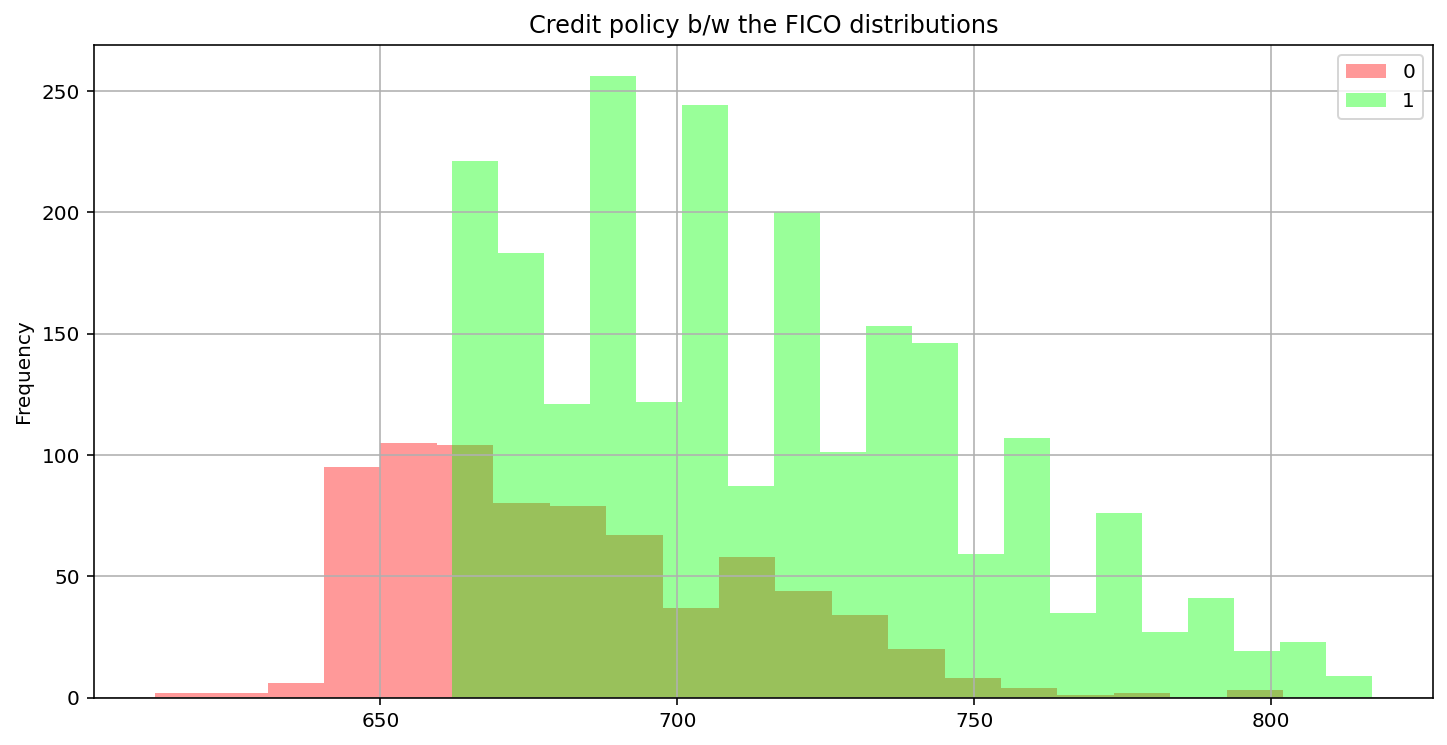

In [14]:
#Plotting the histogram 
plt.figure(figsize=(12,6))
#Using the group by function to plot the histogram b/w 'credit.policy' and 'fico' 
#Using 20 bins and the transparency is set to 0.4
loans.groupby('credit.policy')['fico'].plot(kind ='hist', bins=20, alpha = 0.4, title='Credit policy b/w the FICO distributions', 
                                            legend =True,grid = True)
plt.show()

The people that have 1 credit policy outcome has FICO distributions lies between 670 and 680 and the people that have 0 credit policy outcome has FICO distributions lies between 640 and 670.

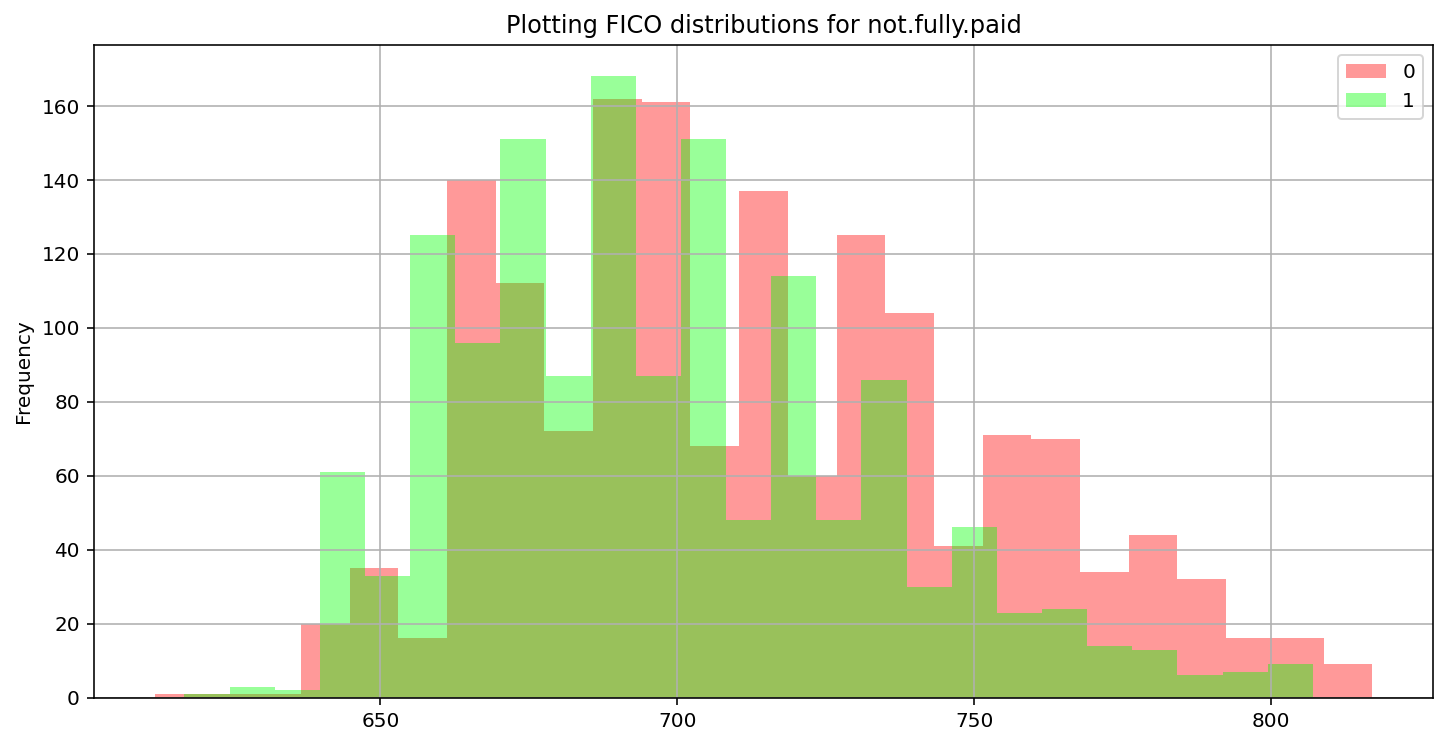

In [15]:
#Plotting histogram for not.fully.paid 
plt.figure(figsize=(12,6))
#Using the group by function to plot the histogram b/w 'not.fully.paid' and 'fico' 
loans.groupby('not.fully.paid')['fico'].plot(kind ='hist', bins=25, alpha = 0.4, title='Plotting FICO distributions for not.fully.paid', 
                                             legend =True,grid = True)
plt.show()

People who have paid the loan fully lies between the number 670 and 700 and the people who haven't paid the loan fully lie between 660 and 690 respectively.

**Create a countplot (bar plot showing counts using seaborn) that shows the counts of loans by purpose, with the color hue defined by `not.fully.paid`**

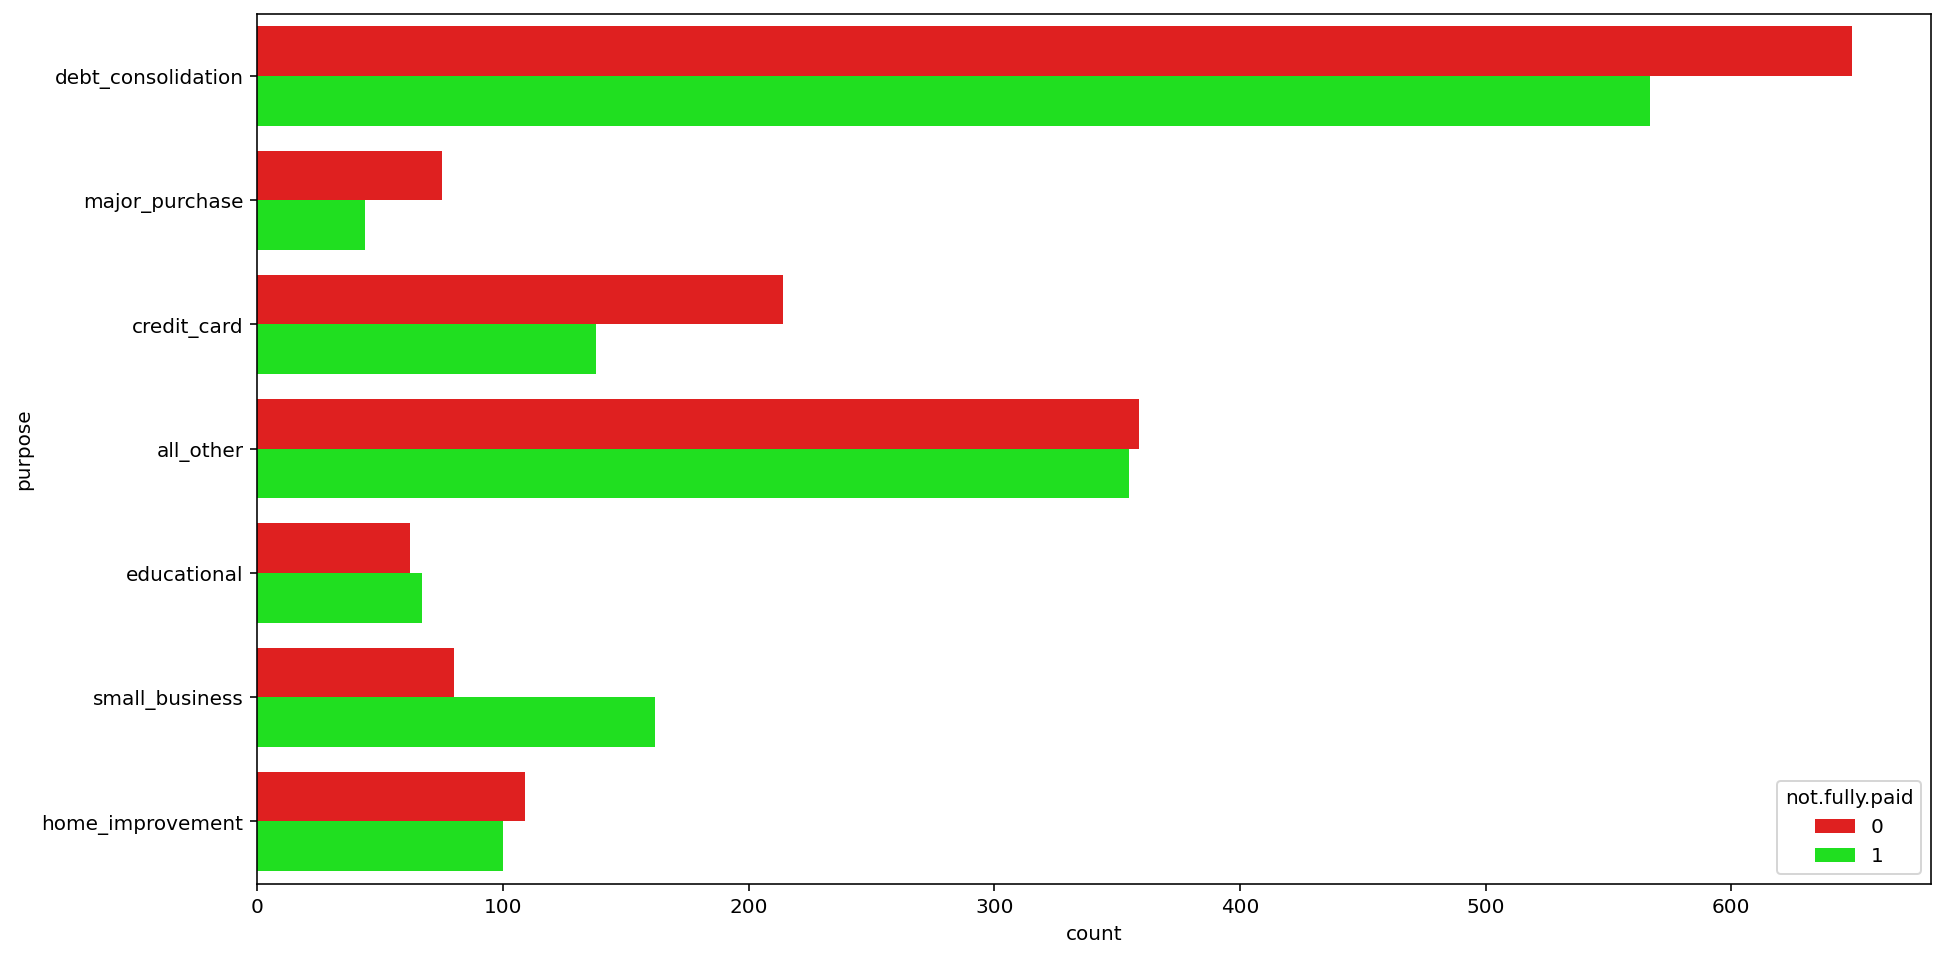

In [16]:
#Plotting the countplot
plt.figure(figsize=(15,8))
#Providing the variable with the color codes of Red and Green respectively
colors = ["#FF0000", "#00FF00"]
sns.set_palette(sns.color_palette(colors))
#Creating a countplot to show the people vs purpose
sns.countplot(data = loans, y='purpose', hue ='not.fully.paid')
plt.show()

From the above seaborn function implemented we can see that the people under the debt_consolidation are considered to have not fully paid the loan whereas the education has the people with less in number in terms of not fully paid the loan.

**Let's see the trend between FICO score and interest rate. Recreate the following jointplot.**

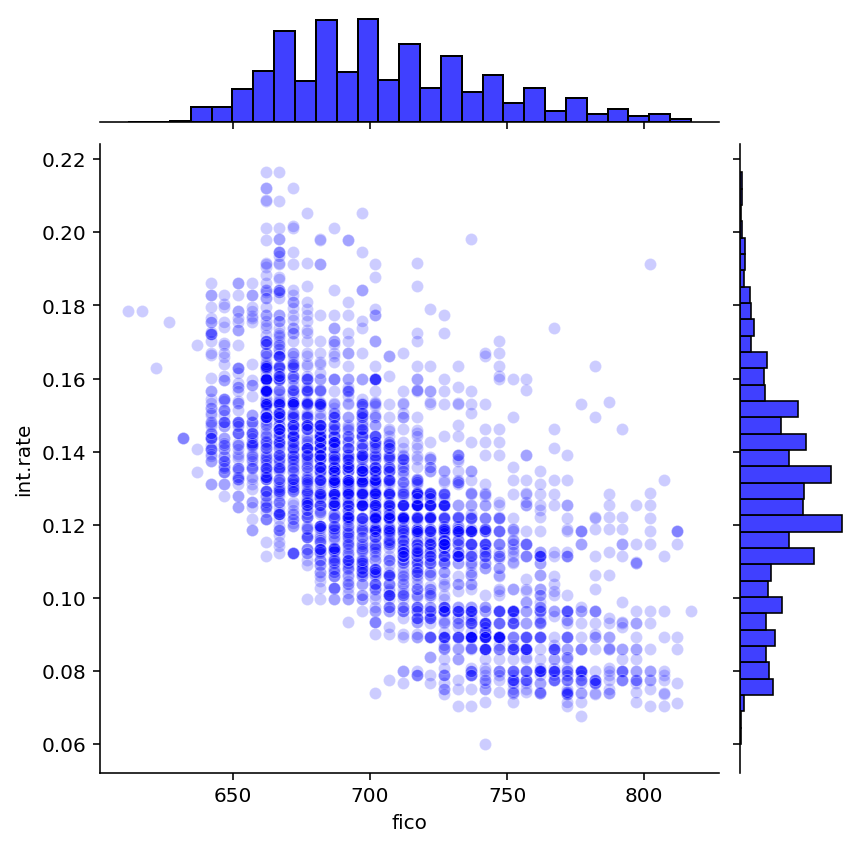

In [17]:
#FICO vs Intrest Rate
sns.jointplot('fico', 'int.rate', data =loans, color="#0000FF", alpha =0.2)
plt.show()

Higher the FICO score, the lower the int rate and lower the FICO score higher the int rate. 

**Create the following lmplots to see if the trend differed between `not.fully.paid` and `int.rate`. Check the documentation for seaborn `lmplot()` if you can't figure out how to separate it into columns.**

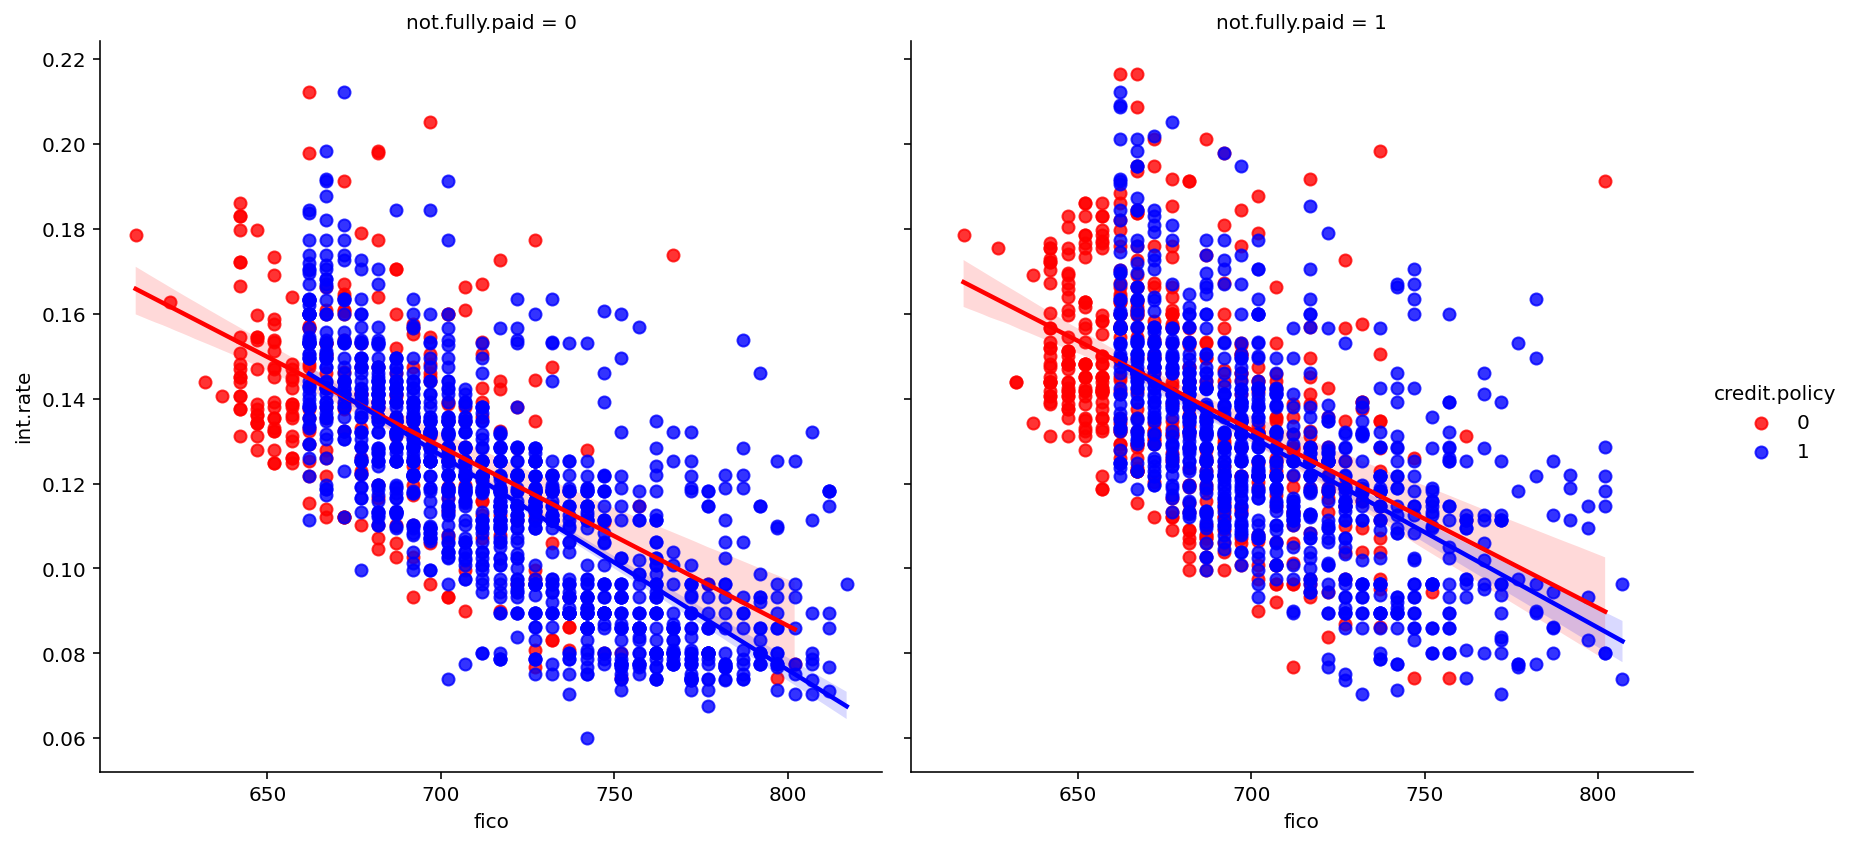

In [18]:
#Providing the variable with the color codes of Red and Blue respectively
colors = ["#FF0000", "#0000FF"]
sns.set_palette(sns.color_palette(colors))
#Plotting between the not.fully.paid and int.rate
sns.lmplot("fico", 'int.rate', data =loans, fit_reg=True, aspect=1, height=6, hue = 'credit.policy',col='not.fully.paid')
plt.show()

The credit policy with 0 between FICO score lies between 620 and 680 and for the credit policy with 1 it lies in the range between 660 and 800.

# Q3

## Setting up the Data

Let's get ready to set up our data for our models!

**This question has already been solved. You don't need to do anything. Just run the cells and continue.**

In [19]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2981 entries, 0 to 2980
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      2981 non-null   int64  
 1   purpose            2981 non-null   object 
 2   int.rate           2981 non-null   float64
 3   installment        2981 non-null   float64
 4   log.annual.inc     2981 non-null   float64
 5   dti                2981 non-null   float64
 6   fico               2981 non-null   int64  
 7   days.with.cr.line  2981 non-null   float64
 8   revol.bal          2981 non-null   int64  
 9   revol.util         2981 non-null   float64
 10  inq.last.6mths     2981 non-null   int64  
 11  delinq.2yrs        2981 non-null   int64  
 12  pub.rec            2981 non-null   int64  
 13  not.fully.paid     2981 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 326.2+ KB


## Categorical Features

Notice that the **purpose** column is of categorical type.

That means we need to transform them using dummy variables so sklearn will be able to understand them.   

Let's do this in one step using pd.get_dummies().


> The same transformation needs to be aplied on the test set as well. The easiest way would be to merge train and test sets, and to split after the transformation.

In [20]:
cat_feats = ['purpose']

In [21]:
loans = pd.get_dummies(loans, columns=cat_feats, drop_first=False)

In [22]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2981 entries, 0 to 2980
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               2981 non-null   int64  
 1   int.rate                    2981 non-null   float64
 2   installment                 2981 non-null   float64
 3   log.annual.inc              2981 non-null   float64
 4   dti                         2981 non-null   float64
 5   fico                        2981 non-null   int64  
 6   days.with.cr.line           2981 non-null   float64
 7   revol.bal                   2981 non-null   int64  
 8   revol.util                  2981 non-null   float64
 9   inq.last.6mths              2981 non-null   int64  
 10  delinq.2yrs                 2981 non-null   int64  
 11  pub.rec                     2981 non-null   int64  
 12  not.fully.paid              2981 non-null   int64  
 13  purpose_all_other           2981 

In [23]:
loans.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1183,231.94,10.348846,5.69,712,2460.958333,6955,63.8,1,0,0,0,0,0,1,0,0,0,0
1,1,0.0774,124.88,11.264464,7.17,792,6360.041667,168,0.7,0,0,0,0,0,0,0,0,0,1,0
2,1,0.1505,86.73,11.184421,16.30,667,3600.000000,16242,95.5,0,0,0,0,0,1,0,0,0,0,0
3,1,0.1284,403.42,10.736397,19.57,697,3450.041667,27261,87.4,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1531,278.53,10.621327,8.20,662,1860.000000,7979,48.7,0,1,0,0,0,0,1,0,0,0,0


## Train Test Split

Now its time to split our data into a training set and a validation set!  

The `not.fully.paid` variable is the one that we will try to predict.

**Use sklearn to split your data into a training set and a testing set as we've done in the past.**

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
loans

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1183,231.94,10.348846,5.69,712,2460.958333,6955,63.8,1,0,0,0,0,0,1,0,0,0,0
1,1,0.0774,124.88,11.264464,7.17,792,6360.041667,168,0.7,0,0,0,0,0,0,0,0,0,1,0
2,1,0.1505,86.73,11.184421,16.30,667,3600.000000,16242,95.5,0,0,0,0,0,1,0,0,0,0,0
3,1,0.1284,403.42,10.736397,19.57,697,3450.041667,27261,87.4,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1531,278.53,10.621327,8.20,662,1860.000000,7979,48.7,0,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2976,0,0.1797,364.99,10.762488,23.53,642,4252.041667,10226,63.9,1,1,0,0,0,0,1,0,0,0,0
2977,1,0.1316,202.63,11.156251,23.91,692,2130.000000,22713,43.1,1,0,0,0,0,0,1,0,0,0,0
2978,1,0.1148,263.75,10.491274,2.90,727,1800.000000,2980,31.7,1,0,0,0,0,0,1,0,0,0,0
2979,1,0.1442,859.57,12.611538,1.48,702,5279.958333,28367,66.5,2,1,0,0,0,0,0,0,1,0,0


In [26]:
X = loans.drop('not.fully.paid',axis=1)
y = loans['not.fully.paid']
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=RANDOM_STATE)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.50, random_state=RANDOM_STATE)

<AxesSubplot: >

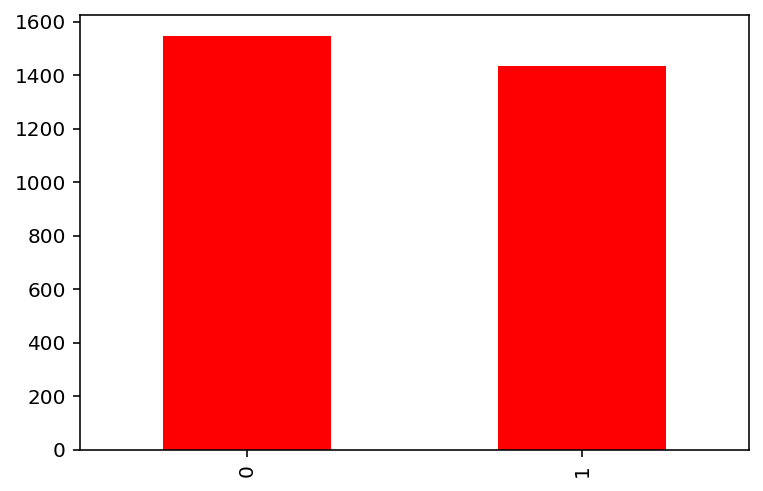

In [27]:
y.value_counts().plot(kind='bar')

<AxesSubplot: >

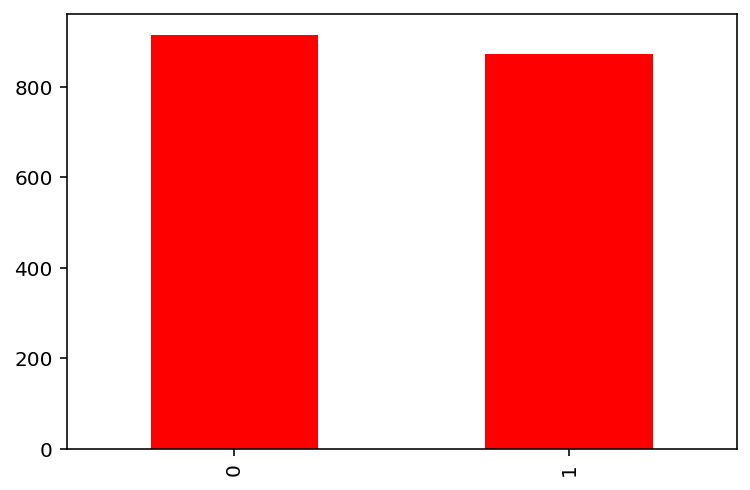

In [28]:
y_train.value_counts().plot(kind='bar')

<AxesSubplot: >

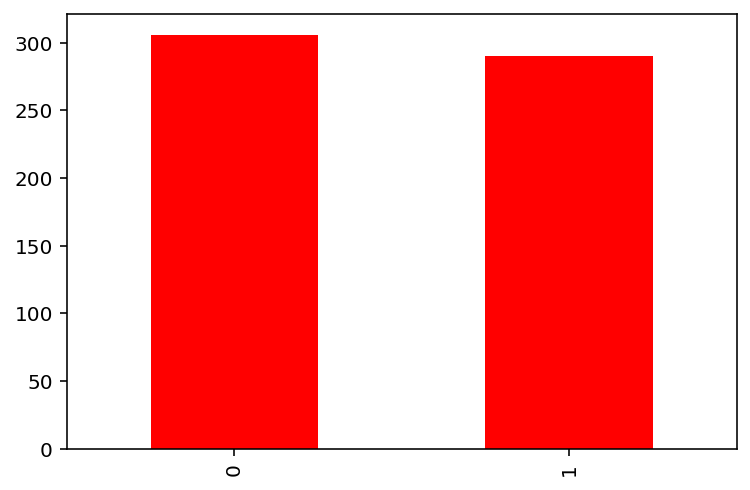

In [29]:
y_val.value_counts().plot(kind='bar')

> NOTE:

When asked to provide the performance metrics you can use the confusion matrix or the methods in `sklearn.metrics`.  
**Performance metrics** (at the very least):  
- Recall (Sensitivity)  
- Specificity  
- Precision  
- Balanced Accuracy  
- F1 Score  

Grid Search:
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html


# Q4

## Decision Tree Model

Let's start by training a single decision tree first!

1. Default decision tree:
    - Initiate the Decision Tree classifier from the sklearn library. Keep all parameters with their default values. (No need to specify anything)
    - Fit the model
    - Make predictions
    - Calculate accuracy score. What are the **training** and **validation** accuracies of the model?
    - Create confusion matrix
    - Provide the performance metrics for the **validation** set.


2. Using the training data perform hyper-parameter tuning. Use an appropriate metric for scoring (f1 is generally good).
    - Try several values for the `min_samples_split` hyper-parameter and apply cross validation (`GridSearchCV`) to find the best value.  
        - Using the best model provide the performance metrics for the validation set.
    - Try several values for the `max_depth` hyper-parameter and apply cross validation (`GridSearchCV`) to find the best value. 
        - Using the best model provide the performance metrics for the validation set.
    - Perform grid search (`GridSearchCV`) where you check for `min_samples_split` and `max_depth`.
        - Using the best model provide the performance metrics for the validation set.
        
        
3. Create a chart showing the feature importances based on the best model obtained.

In [30]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [31]:
# code
#Initialize and fitting the model
dec_tre = DecisionTreeClassifier()
dec_tre.fit(X_train, y_train)

DecisionTreeClassifier()

In [32]:
#Accuracy train and test
pred_tr = dec_tre.predict(X_train)
#Printing the accuracy score for the train
print("Accuracy Scores (Train): ",metrics.accuracy_score(y_true = y_train, y_pred = pred_tr))

Accuracy Scores (Train):  1.0


In [33]:
pred = dec_tre.predict(X_val)
print("Accuracy Scores (Test): ",metrics.accuracy_score(y_true = y_val, y_pred = pred))

Accuracy Scores (Test):  0.575503355704698


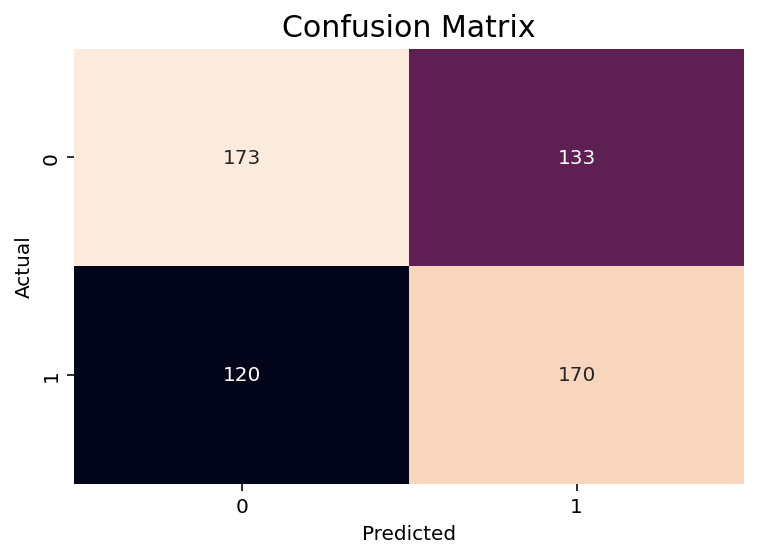

              precision    recall  f1-score   support

           0       0.59      0.57      0.58       306
           1       0.56      0.59      0.57       290

    accuracy                           0.58       596
   macro avg       0.58      0.58      0.58       596
weighted avg       0.58      0.58      0.58       596


Performance Metrics:
Sensitivity 0.586207
Specificity 0.565359
Precision 0.561056
Accuracy 0.575503
F1-score 0.573356


In [34]:
#Creating the confusion matrix
conf_mat = pd.crosstab(index=np.ravel(y_val), columns=pred.ravel(), rownames=['Actual'], colnames=['Predicted'])
#Using the seaborn fn for the heatmap
sns.heatmap(conf_mat, annot=True, square=False, fmt='', cbar=False)
#Title
plt.title("Confusion Matrix", fontsize = 15)
#Plotting the confusion matrix
plt.show()
dt_met = metrics.classification_report(y_true = y_val, y_pred = pred,  output_dict=True)
print(metrics.classification_report(y_true = y_val, y_pred = pred))
#Calculating the performance metrics
print("\nPerformance Metrics:")
#Sensitivity
print("Sensitivity %f"%(dt_met['1']['recall']))
#Specificity
print("Specificity %f"%(dt_met['0']['recall']))
#Precision
print("Precision %f"%(dt_met['1']['precision']))
#Accuracy
print("Accuracy %f"%(dt_met['accuracy']))
#F1-score
print("F1-score %f"%(dt_met['1']['f1-score']))

In [35]:
#min_samples_split hyperparameter
Min_Samp_list = [10, 50, 100, 200, 300, 500]
#Creating an empty list for the accuracy
acc_valid = []
for ms in Min_Samp_list:
    dec_tre = DecisionTreeClassifier(min_samples_split= ms, random_state = 42)
    dec_tre.fit(X_train, y_train)
    pred_tr = dec_tre.predict(X_train)
    score_valid= cross_val_score(dec_tre,X_train, y_train, scoring = "f1", cv =5 )
    acc_valid.append(score_valid.mean())
#Printing the accuracy score
print("f1 score: ")
acc_valid

f1 score: 


[0.5333460697759731,
 0.5524732397741945,
 0.581813787902817,
 0.5528062425671852,
 0.5754209081329895,
 0.5887755642733794]

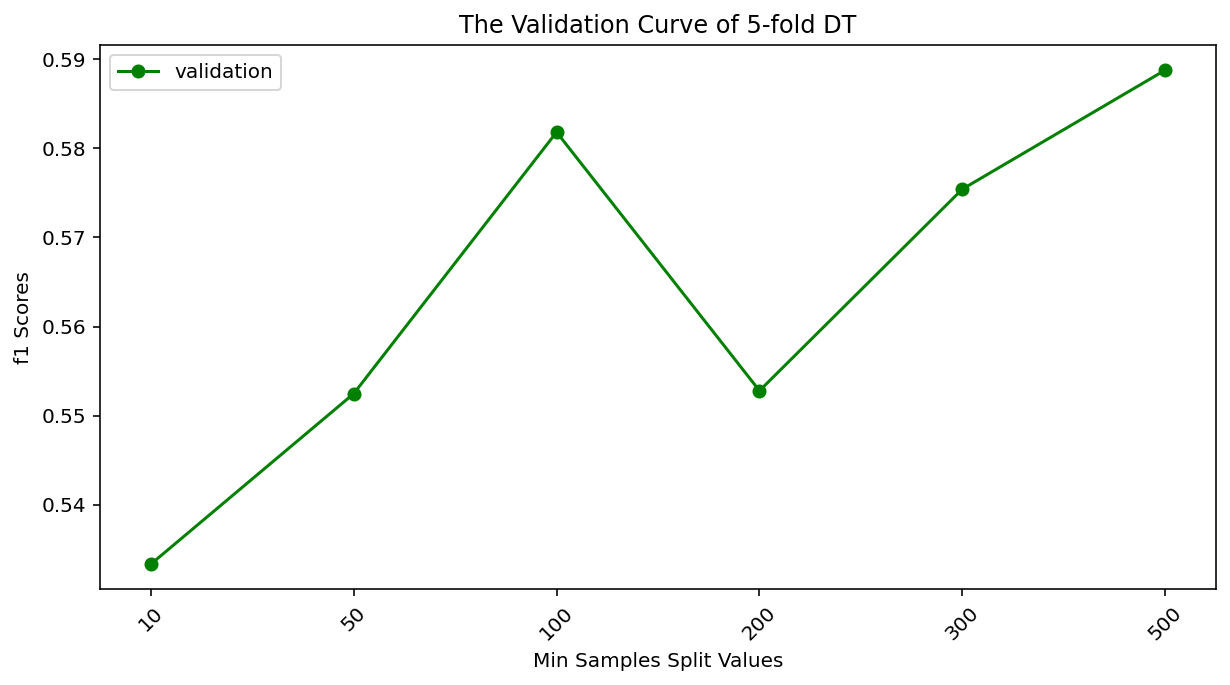

In [36]:
#Plotting the validation curve for the DT
plt.figure(figsize=(10,5))
plt.title("The Validation Curve of 5-fold DT")
plt.plot(acc_valid, 'go-',label = 'validation')
plt.xticks(np.arange(len(Min_Samp_list)), Min_Samp_list, rotation = 45)
plt.xlabel('Min Samples Split Values')
plt.ylabel('f1 Scores')
plt.legend()
plt.show()

500 is considered to be the best min-max split 

In [37]:
#max_depth hyperparameter 
max_dep_list = [2, 5, 10, 15, 20, 30]
#Creating an empty list for the accuracy
acc_valid = []
for md in max_dep_list:
    dec_tre = DecisionTreeClassifier(max_depth=md, random_state = 42)
    dec_tre.fit(X_train, y_train)
    pred_train = dec_tre.predict(X_train)
    score_valid= cross_val_score(dec_tre,X_train, y_train, scoring = "f1", cv =5 )
    acc_valid.append(score_valid.mean())
#Printing the accuracy score 
print("f1 score: ")
acc_valid

f1 score: 


[0.4744035281612315,
 0.5548354315218504,
 0.5335536143953,
 0.541848395852524,
 0.537254291671168,
 0.5394820796646818]

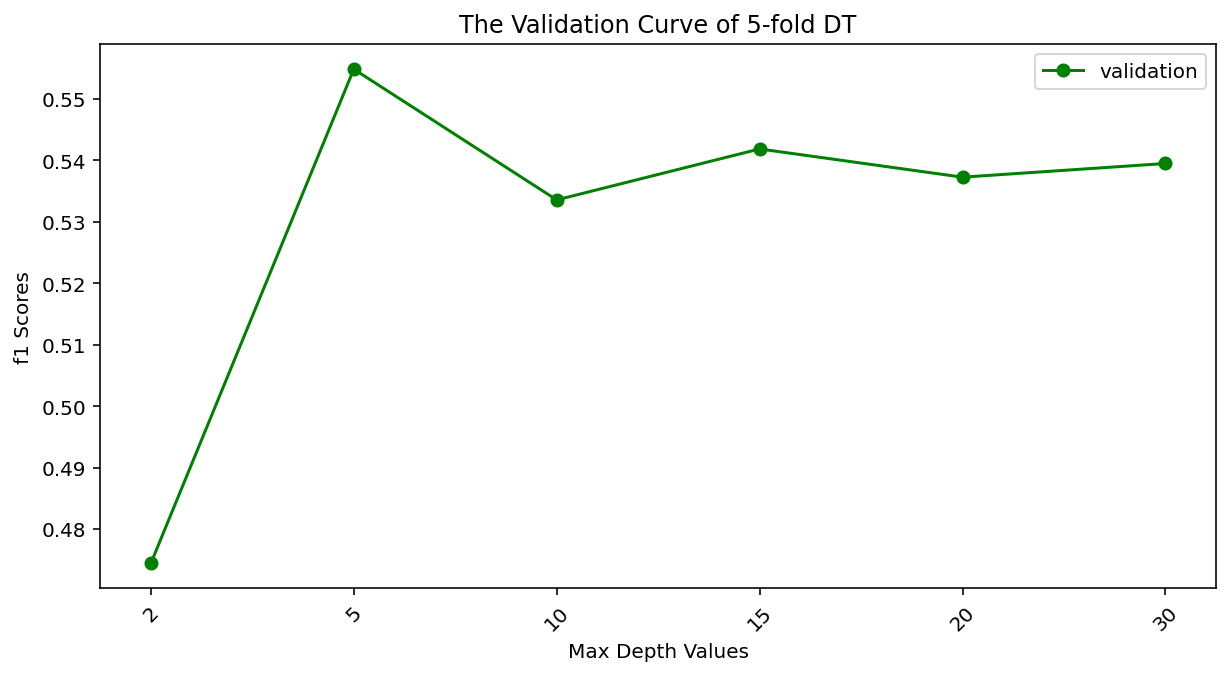

In [38]:
#Plotting the validation curve for the DT
plt.figure(figsize=(10,5))
plt.title("The Validation Curve of 5-fold DT")
plt.plot(acc_valid, 'go-',label = 'validation')
plt.xticks(np.arange(len(max_dep_list)), max_dep_list, rotation = 45)
plt.xlabel('Max Depth Values')
plt.ylabel('f1 Scores')
plt.legend()
plt.show()

From the above curve we can consider that the maximum depth will be 5

In [39]:
#Grid Search with scoring = "F1-Score"
#Min-sample
Min_Samp_list = [10, 50, 100, 200, 300, 500]
#Max-Depth
max_dep_list = [2, 3, 4]
params = {'min_samples_split': Min_Samp_list,
         'max_depth': max_dep_list, 'random_state': [42]}
dec_tre = DecisionTreeClassifier()
grid = GridSearchCV(estimator=dec_tre, param_grid=params, cv=5, scoring="f1")

In [40]:
#Fitting the grid search
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4],
                         'min_samples_split': [10, 50, 100, 200, 300, 500],
                         'random_state': [42]},
             scoring='f1')

In [41]:
#The best parameters are found
grid.best_params_

{'max_depth': 4, 'min_samples_split': 500, 'random_state': 42}

In [42]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_split=500, random_state=42)

In [43]:
#Fitting the best model for the grid search 
dec_tre = DecisionTreeClassifier(max_depth = 4, min_samples_split = 500, random_state = 42)
dec_tre.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=500, random_state=42)

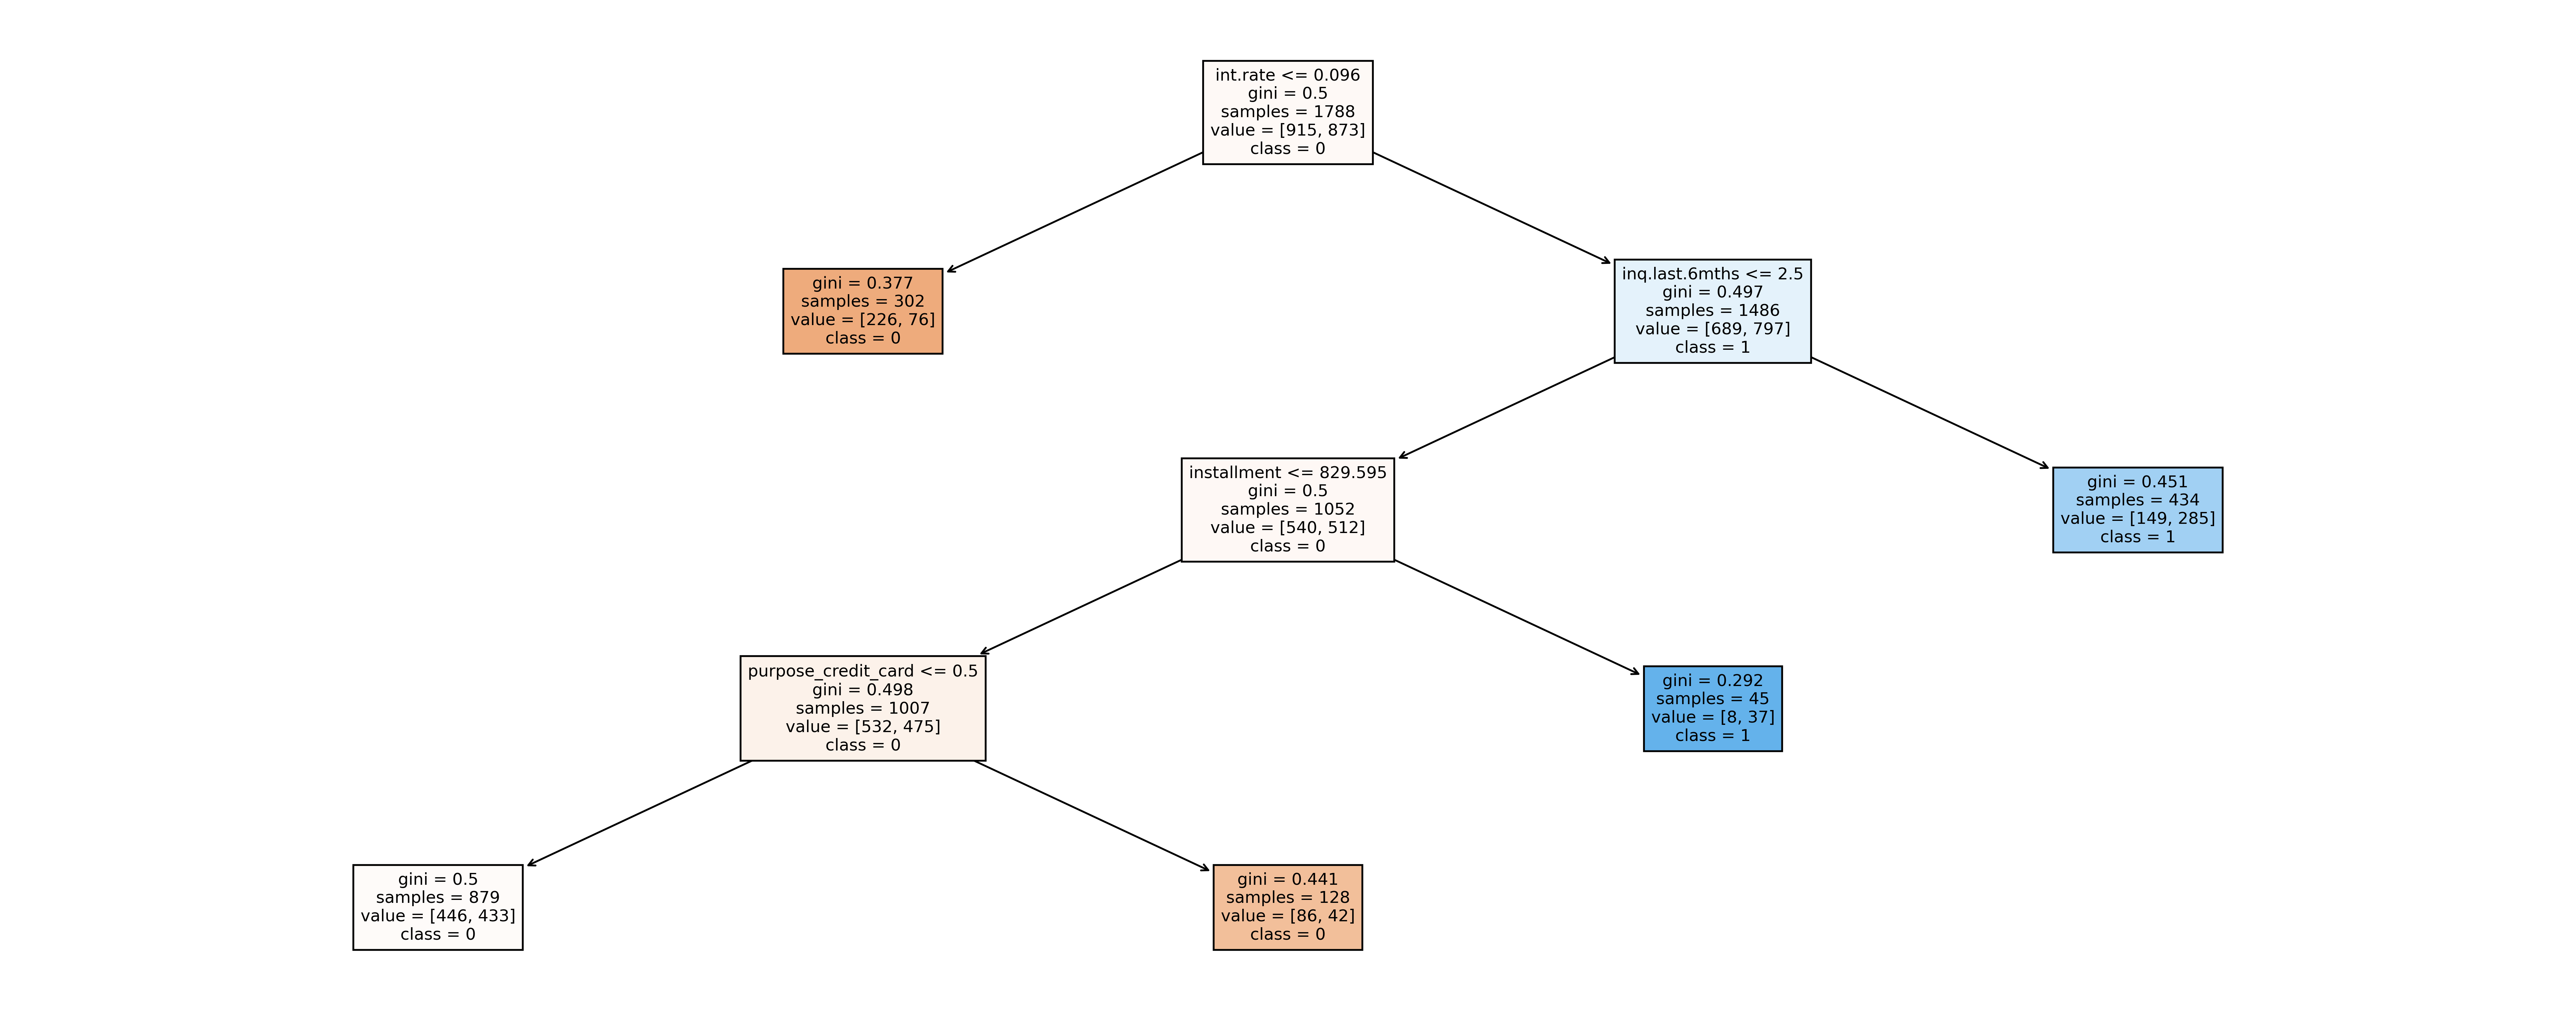

In [44]:
best_dec_tre = dec_tre
fn = X_train.columns
cn = ['0','1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (25,10), dpi=200)
tree.plot_tree(best_dec_tre,feature_names = fn, class_names=cn, filled = True, fontsize=9);

In [45]:
#Computing the accuracy score for train and test
pred_tr = dec_tre.predict(X_train)
print("Accuracy Scores for train: ",metrics.accuracy_score(y_true = y_train, y_pred = pred_tr))
pred = dec_tre.predict(X_val)
print("Accuracy Scores for test: ",metrics.accuracy_score(y_true = y_val, y_pred = pred))

Accuracy Scores for train:  0.6040268456375839
Accuracy Scores for test:  0.5956375838926175


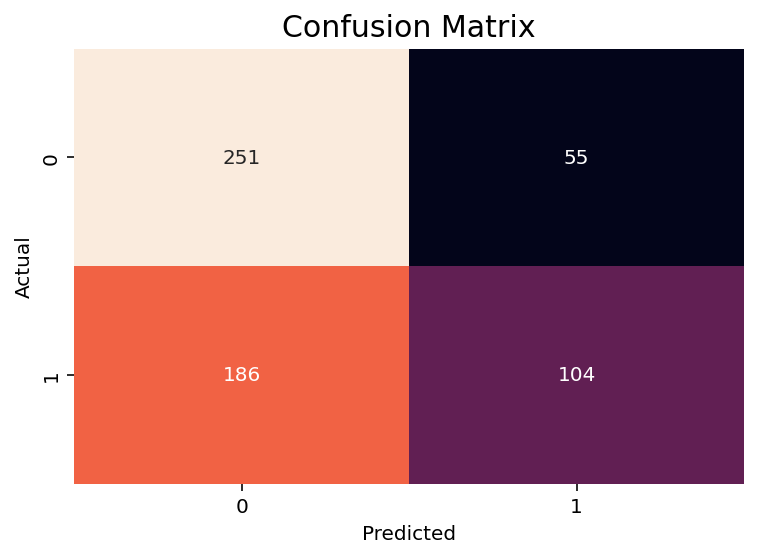

              precision    recall  f1-score   support

           0       0.57      0.82      0.68       306
           1       0.65      0.36      0.46       290

    accuracy                           0.60       596
   macro avg       0.61      0.59      0.57       596
weighted avg       0.61      0.60      0.57       596


Performance Metrics:
Sensitivity 0.358621
Specificity 0.820261
Precision 0.654088
Accuracy 0.595638
F1-score 0.463252


In [46]:
#Creating the confusion matrix
conf_mat = pd.crosstab(index=np.ravel(y_val), columns=pred.ravel(), rownames=['Actual'], colnames=['Predicted'])
#Using the seaborn fn for the heatmap
sns.heatmap(conf_mat, annot=True, square=False, fmt='', cbar=False)
#Title
plt.title("Confusion Matrix", fontsize = 15)
#Plotting the confusion matrix
plt.show()
dec_tre_met = metrics.classification_report(y_true = y_val, y_pred = pred,  output_dict=True)
print(metrics.classification_report(y_true = y_val, y_pred = pred))
#Calculating the performance metrics
print("\nPerformance Metrics:")
#Sensitivity
print("Sensitivity %f"%(dec_tre_met['1']['recall']))
#Specificity
print("Specificity %f"%(dec_tre_met['0']['recall']))
#Precision
print("Precision %f"%(dec_tre_met['1']['precision']))
#Accuracy
print("Accuracy %f"%(dec_tre_met['accuracy']))
#F1-score
print("F1-score %f"%(dec_tre_met['1']['f1-score']))

Furthermore, we can derive a conclusion that the best model that was computed was considered to have higher accuracy and precision. Moreover, we can see that the accuracy, precision being higher. The Recall and F1-score for the best model is relatively low in prediciting. Since, the accuracy of train and test are higher, it helps in less overfitting.

# Q5

## Random Forest model

1. Default Random Forest Classifier:
    - Initiate the Random Forest Classifier from the sklearn library. Keep all parameters with their default values. (No need to specify anything)
    - Fit the model
    - Make predictions
    - Calculate accuracy score. What are the **training** and **validation** accuracies of the model?
    - Create confusion matrix
    - Provide the performance metrics for the **validation** set.
    
    
2. Using the training data perform hyper-parameter tuning. Use an appropriate metric for scoring (f1 is generally good).
    - Perform grid search (`GridSearchCV`) where you check for `min_samples_split`, `max_depth`, and `n_estimators`.
        - Using the best model provide the performance metrics for the validation set.
       
3. Create a chart showing the feature importances based on the best model obtained.

In [269]:
from sklearn.ensemble import RandomForestClassifier

In [270]:
# code
rnd_for = RandomForestClassifier()
#Fitting the model
rnd_for.fit(X_train, y_train)

RandomForestClassifier()

In [271]:
#Accuracy is computed for both training and testing
#Training
pred_train = rnd_for.predict(X_train)
print("Accuracy Scores Train: ",metrics.accuracy_score(y_true = y_train, y_pred = pred_train))
#Testing
pred = rnd_for.predict(X_val)
print("Accuracy Scores Test: ",metrics.accuracy_score(y_true = y_val, y_pred = pred))

Accuracy Scores Train:  1.0
Accuracy Scores Test:  0.6090604026845637


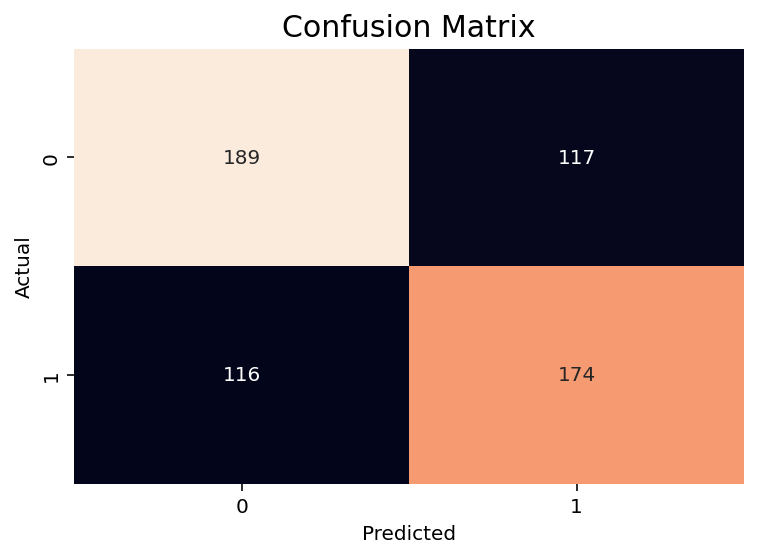

              precision    recall  f1-score   support

           0       0.62      0.62      0.62       306
           1       0.60      0.60      0.60       290

    accuracy                           0.61       596
   macro avg       0.61      0.61      0.61       596
weighted avg       0.61      0.61      0.61       596


Performance Metrics:
Sensitivity 0.600000
Specificity 0.617647
Precision 0.597938
Accuracy 0.609060
F1-score 0.598967


In [272]:
#Calculating the performance metrics and also plotting the confusion matrix 
#Creating the confusion matrix
conf_mat = pd.crosstab(index=np.ravel(y_val), columns=pred.ravel(), rownames=['Actual'], colnames=['Predicted'])
#Using the seaborn fn for the heatmap
sns.heatmap(conf_mat, annot=True, square=False, fmt='', cbar=False)
#Title
plt.title("Confusion Matrix", fontsize = 15)
#Plotting the confusion matrix
plt.show()
rnd_for_met = metrics.classification_report(y_true = y_val, y_pred = pred,  output_dict=True)
print(metrics.classification_report(y_true = y_val, y_pred = pred))
#Calculating the performance metrics
print("\nPerformance Metrics:")
#Sensitivity
print("Sensitivity %f"%(rnd_for_met['1']['recall']))
#Specificity
print("Specificity %f"%(rnd_for_met['0']['recall']))
#Precision
print("Precision %f"%(rnd_for_met['1']['precision']))
#Accuracy
print("Accuracy %f"%(rnd_for_met['accuracy']))
#F1-score
print("F1-score %f"%(rnd_for_met['1']['f1-score']))

In [273]:
#min_samples_split hyperparameter
Min_Samp_list = [10, 50, 100, 200, 300, 500]
#Creating an empty list for the accuracy
acc_valid = []
for ms in Min_Samp_list:
    rnd_for = RandomForestClassifier(min_samples_split= ms, random_state = 42)
    rnd_for.fit(X_train, y_train)
    pred_tr = rnd_for.predict(X_train)
    score_valid= cross_val_score(rnd_for,X_train, y_train, scoring = "f1", cv =5 )
    acc_valid.append(score_valid.mean())
#Printing the accuracy score
print("f1 score: ")
acc_valid

f1 score: 


[0.579915201774523,
 0.6164273674305853,
 0.6023397238810403,
 0.5978418559919425,
 0.5853594814804035,
 0.5798909168337738]

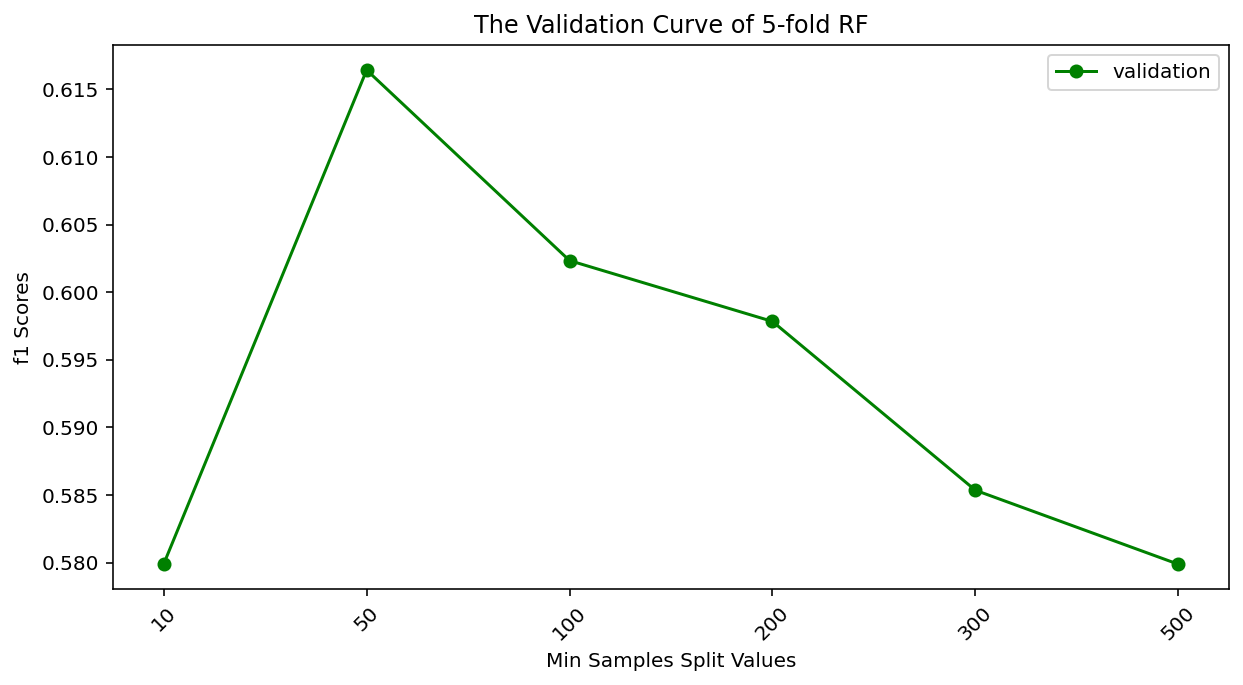

In [274]:
#Plotting the validation curve for the RF
plt.figure(figsize=(10,5))
plt.title("The Validation Curve of 5-fold RF")
plt.plot(acc_valid, 'go-',label = 'validation')
plt.xticks(np.arange(len(Min_Samp_list)), Min_Samp_list, rotation = 45)
plt.xlabel('Min Samples Split Values')
plt.ylabel('f1 Scores')
plt.legend()
plt.show()

So, 50 is considered to be the best Min Samples Split Values

In [275]:
#max_depth hyperparameter 
max_dep_list = [2, 5, 10, 15, 20, 30]
#Creating an empty list for the accuracy
acc_valid = []
for md in max_dep_list:
    rnd_for = RandomForestClassifier(max_depth=md, random_state = 42)
    rnd_for.fit(X_train, y_train)
    pred_train = rnd_for.predict(X_train)
    score_valid= cross_val_score(rnd_for,X_train, y_train, scoring = "f1", cv =5 )
    acc_valid.append(score_valid.mean())
#Printing the accuracy score 
print("f1 score: ")
acc_valid

f1 score: 


[0.5547970991752653,
 0.5930521550398983,
 0.5882702595394325,
 0.5782515536226343,
 0.5809664174869009,
 0.5627051466709551]

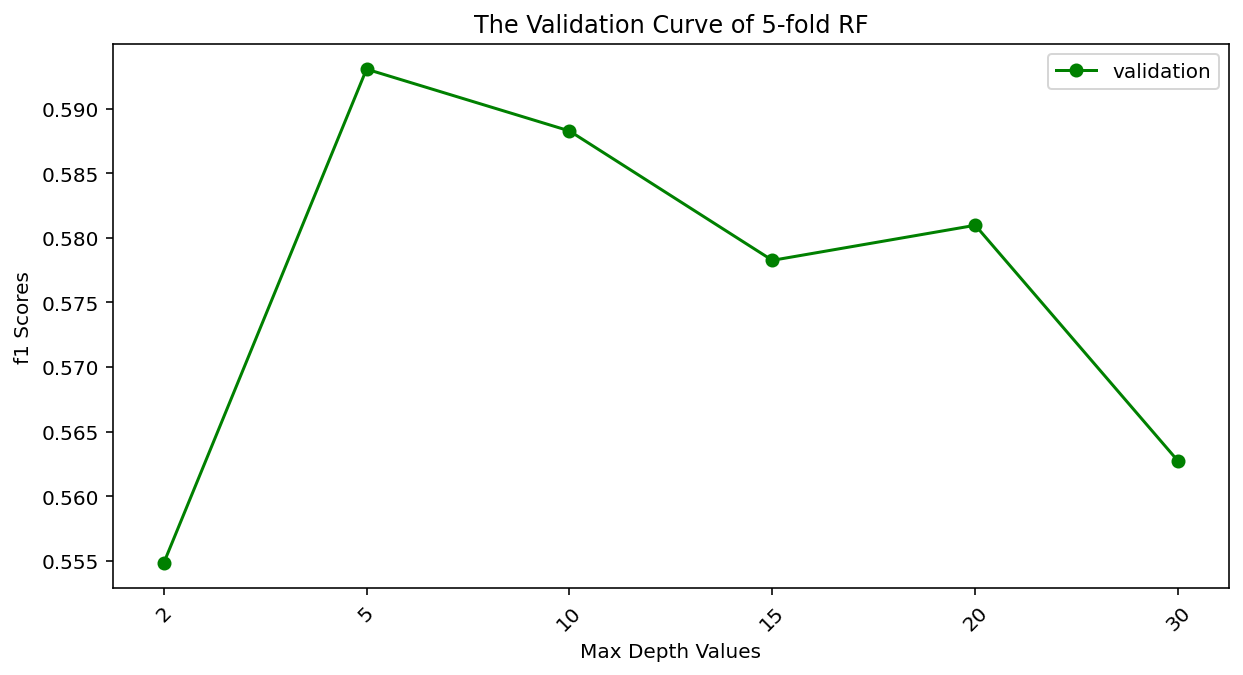

In [276]:
#Plotting the validation curve for the RF
plt.figure(figsize=(10,5))
plt.title("The Validation Curve of 5-fold RF")
plt.plot(acc_valid, 'go-',label = 'validation')
plt.xticks(np.arange(len(max_dep_list)), max_dep_list, rotation = 45)
plt.xlabel('Max Depth Values')
plt.ylabel('f1 Scores')
plt.legend()
plt.show()

The max depth value from the above plot is considered to be 5

In [277]:
#Estimators
Est_list = [10, 50, 100, 200, 300, 400]
#Creating an empty list for the accuracy
acc_valid = []
for et in Est_list:
    rnd_for = RandomForestClassifier(n_estimators=et, random_state = 42)
    rnd_for.fit(X_train, y_train)
    pred_train = rnd_for.predict(X_train)
    score_valid= cross_val_score(rnd_for,X_train, y_train, scoring = "f1", cv =5 )
    acc_valid.append(score_valid.mean())
#Printing the accuracy score
print("f1 score")
acc_valid

f1 score


[0.5333985098688874,
 0.567531037145763,
 0.5634013334425942,
 0.5798080864006414,
 0.5821548535024644,
 0.5798216356517409]

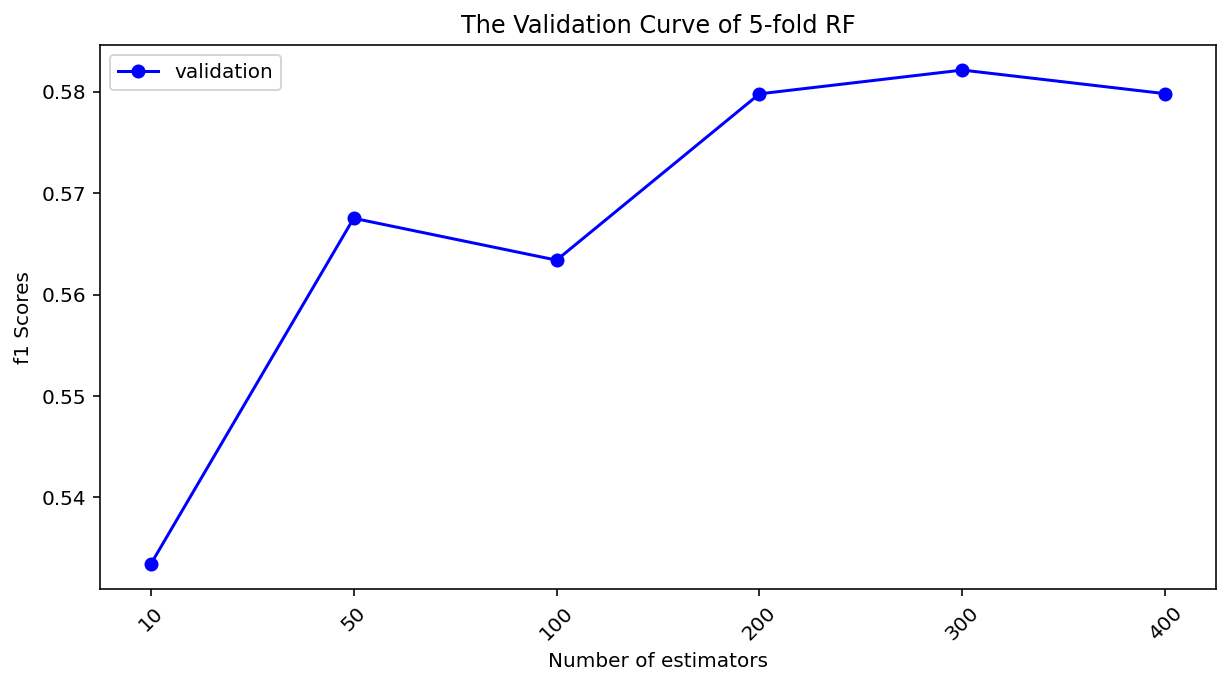

In [278]:
#Plotting the validation curve for the RF
plt.figure(figsize=(10,5))
#Title
plt.title("The Validation Curve of 5-fold RF")
plt.plot(acc_valid, 'bo-',label = 'validation')
plt.xticks(np.arange(len(Est_list)), Est_list, rotation = 45)
plt.xlabel('Number of estimators')
plt.ylabel('f1 Scores')
plt.legend()
plt.show()

The best n_estimators are 300

In [279]:
#Performing a grid search
#List of min_samples
Min_Samp_list = [10, 50, 100, 200, 300, 500]
#List of Estimators
Est_list = [10, 50, 100, 200, 300, 400]
#List of max_depth
max_dep_list = [2, 5, 10, 15, 20, 30]
params = {'n_estimators': Est_list,
          'min_samples_split': Min_Samp_list,
         'max_depth': max_dep_list, 'random_state': [42]}
rnd_for = RandomForestClassifier()
grid = GridSearchCV(estimator=rnd_for, param_grid=params, verbose=1, cv=5,scoring="f1", n_jobs=-1)

In [280]:
#Fitting the grid search 
grid.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 15, 20, 30],
                         'min_samples_split': [10, 50, 100, 200, 300, 500],
                         'n_estimators': [10, 50, 100, 200, 300, 400],
                         'random_state': [42]},
             scoring='f1', verbose=1)

In [281]:
grid.best_params_

{'max_depth': 2,
 'min_samples_split': 300,
 'n_estimators': 10,
 'random_state': 42}

In [282]:
grid.best_estimator_

RandomForestClassifier(max_depth=2, min_samples_split=300, n_estimators=10,
                       random_state=42)

In [283]:
#Fitting the best model
rnd_for = RandomForestClassifier(max_depth=2, min_samples_split=300, n_estimators=10, random_state = 42)
rnd_for.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, min_samples_split=300, n_estimators=10,
                       random_state=42)

In [284]:
#Computing the accuracy score for both train and test
pred_train = rnd_for.predict(X_train)
print("Accuracy Scores Train: ",metrics.accuracy_score(y_true = y_train, y_pred = pred_train))
pred = rnd_for.predict(X_val)
print("Accuracy Scores Test: ",metrics.accuracy_score(y_true = y_val, y_pred = pred))

Accuracy Scores Train:  0.6185682326621924
Accuracy Scores Test:  0.5771812080536913


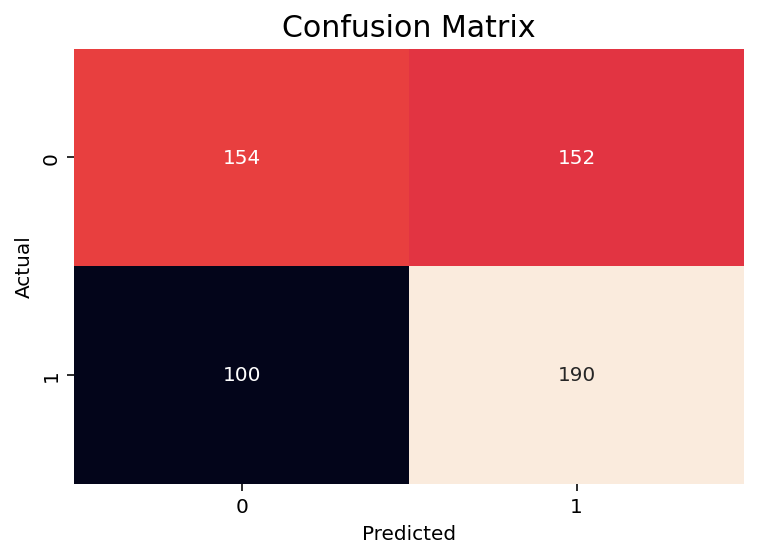

              precision    recall  f1-score   support

           0       0.61      0.50      0.55       306
           1       0.56      0.66      0.60       290

    accuracy                           0.58       596
   macro avg       0.58      0.58      0.58       596
weighted avg       0.58      0.58      0.57       596


Performance Metrics:
Sensitivity 0.655172
Specificity 0.503268
Precision 0.555556
Accuracy 0.577181
F1-score 0.601266


In [285]:
#Calculating the performance metrics and also plotting the confusion matrix 
#Creating the confusion matrix
conf_mat = pd.crosstab(index=np.ravel(y_val), columns=pred.ravel(), rownames=['Actual'], colnames=['Predicted'])
#Using the seaborn fn for the heatmap
sns.heatmap(conf_mat, annot=True, square=False, fmt='', cbar=False)
#Title
plt.title("Confusion Matrix", fontsize = 15)
#Plotting the confusion matrix
plt.show()
rnd_for_met = metrics.classification_report(y_true = y_val, y_pred = pred,  output_dict=True)
print(metrics.classification_report(y_true = y_val, y_pred = pred))
#Calculating the performance metrics
print("\nPerformance Metrics:")
#Sensitivity
print("Sensitivity %f"%(rnd_for_met['1']['recall']))
#Specificity
print("Specificity %f"%(rnd_for_met['0']['recall']))
#Precision
print("Precision %f"%(rnd_for_met['1']['precision']))
#Accuracy
print("Accuracy %f"%(rnd_for_met['accuracy']))
#F1-score
print("F1-score %f"%(rnd_for_met['1']['f1-score']))

These default model and new model can show us that default model is performing good in case of the precision, accuracy, and F1-score and also good in prediciting both the class 0 and 1.

# Q6

## Adaboost model

1. Default Adaboost classifier:
    - Initiate the Adaboost classifier from the sklearn library. Keep all parameters with their default values. (No need to specify anything)
    - Fit the model
    - Make predictions
    - Calculate accuracy score. What are the **training** and **validation** accuracies of the model?
    - Create confusion matrix
    - Provide the performance metrics for the **validation** set.
    
    
2. Using the training data perform hyper-parameter tuning. Use an appropriate metric for scoring (f1 is generally good).
    - Perform grid search (`GridSearchCV`) where you check for `learning_rate`, and `n_estimators`.
        - Using the best model provide the performance metrics for the validation set.
       
3. Create a chart showing the feature importances based on the best model obtained.

In [286]:
from sklearn.ensemble import AdaBoostClassifier

In [287]:
# YOUR CODE
ada_bst = AdaBoostClassifier()
ada_bst.fit(X_train, y_train)

AdaBoostClassifier()

In [288]:
#Accuracy is computed for both the train and test
pred_train = ada_bst.predict(X_train)
print("Accuracy score of Train: ", metrics.accuracy_score(y_true = y_train, y_pred = pred_train))
pred = ada_bst.predict(X_val)
print("Accuracy score of Test: ", metrics.accuracy_score(y_true = y_val, y_pred = pred))

Accuracy score of Train:  0.6739373601789709
Accuracy score of Test:  0.5855704697986577


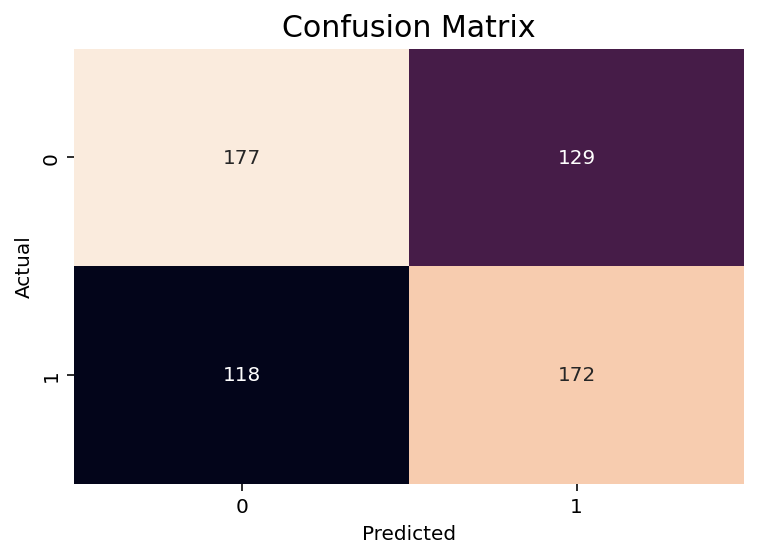

              precision    recall  f1-score   support

           0       0.60      0.58      0.59       306
           1       0.57      0.59      0.58       290

    accuracy                           0.59       596
   macro avg       0.59      0.59      0.59       596
weighted avg       0.59      0.59      0.59       596


Performance Metrics:
Sensitivity 0.593103
Specificity 0.578431
Precision 0.571429
Accuracy 0.585570
F1-score 0.582064


In [289]:
#Calculating the performance metrics and also plotting the confusion matrix 
#Creating the confusion matrix
conf_mat = pd.crosstab(index=np.ravel(y_val), columns=pred.ravel(), rownames=['Actual'], colnames=['Predicted'])
#Using the seaborn fn for the heatmap
sns.heatmap(conf_mat, annot=True, square=False, fmt='', cbar=False)
#Title
plt.title("Confusion Matrix", fontsize = 15)
#Plotting the confusion matrix
plt.show()
ada_bst_met = metrics.classification_report(y_true = y_val, y_pred = pred,  output_dict=True)
print(metrics.classification_report(y_true = y_val, y_pred = pred))
#Calculating the performance metrics
print("\nPerformance Metrics:")
#Sensitivity
print("Sensitivity %f"%(ada_bst_met['1']['recall']))
#Specificity
print("Specificity %f"%(ada_bst_met['0']['recall']))
#Precision
print("Precision %f"%(ada_bst_met['1']['precision']))
#Accuracy
print("Accuracy %f"%(ada_bst_met['accuracy']))
#F1-score
print("F1-score %f"%(ada_bst_met['1']['f1-score']))

In [290]:
#Computing the learning rate
L_rate_list = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0]
acc_valid = []
for lr in L_rate_list:
    ada_bst = AdaBoostClassifier(learning_rate = lr, random_state = 42)
    ada_bst.fit(X_train, y_train)
    pred_train = ada_bst.predict(X_train)
    score_valid = cross_val_score(ada_bst, X_train, y_train, scoring = "f1", cv = 5)
    acc_valid.append(score_valid.mean())
print("f1 Score")
acc_valid

f1 Score


[0.6740074743836223,
 0.6215231238487053,
 0.6048116360140032,
 0.5464100040113329,
 0.5566105121708114,
 0.5939121495588728,
 0.593659967583412]

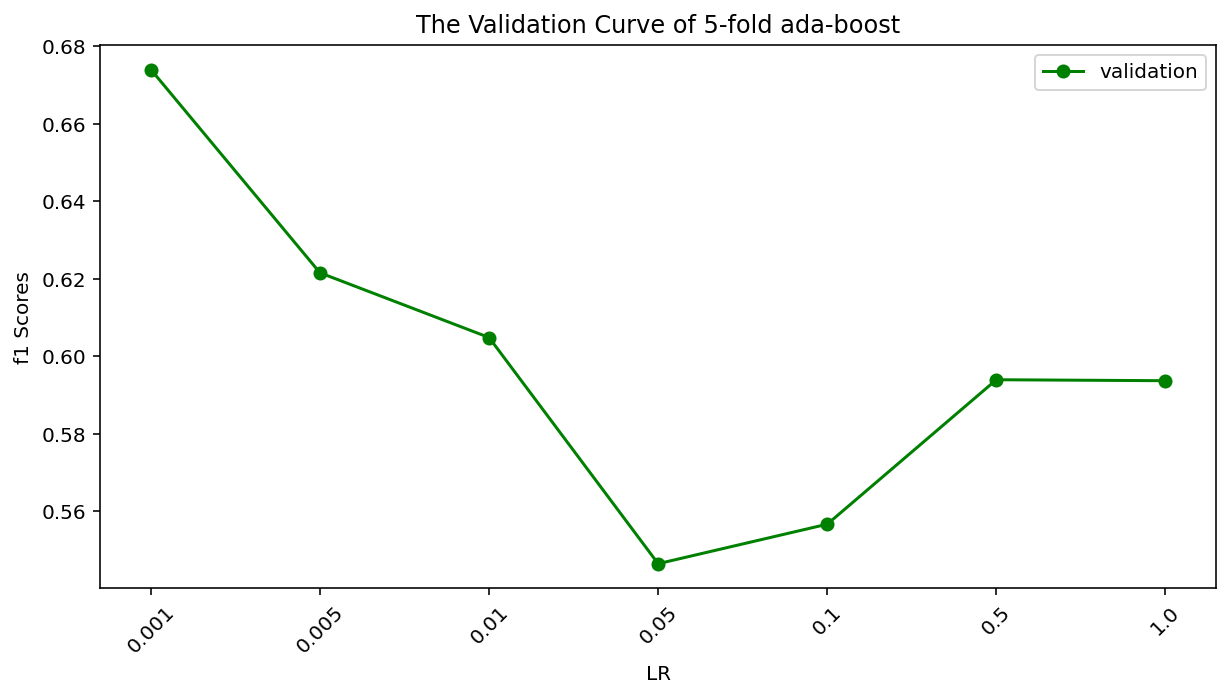

In [291]:
#Plotting the validation curve for the AB
plt.figure(figsize=(10,5))
plt.title("The Validation Curve of 5-fold ada-boost")
plt.plot(acc_valid, 'go-',label = 'validation')
plt.xticks(np.arange(len(L_rate_list)), L_rate_list, rotation = 45)
plt.xlabel('LR')
plt.ylabel('f1 Scores')
plt.legend()
plt.show()

0.001 are considered to be the best learning rates

In [292]:
#Computing the number of estimators
Est_list = [10, 50, 100, 200, 300, 400]
acc_valid = []
for et in Est_list:
    ada_bst = AdaBoostClassifier(n_estimators=et, random_state = 42)
    ada_bst.fit(X_train, y_train)
    pred_train = ada_bst.predict(X_train)
    score_valid= cross_val_score(ada_bst,X_train, y_train, scoring = "f1", cv =5 )
    acc_valid.append(score_valid.mean())
print("f1 score")
acc_valid

f1 score


[0.5643924793450653,
 0.593659967583412,
 0.5711369617989208,
 0.5697275633167218,
 0.5719955229406783,
 0.5579884314178299]

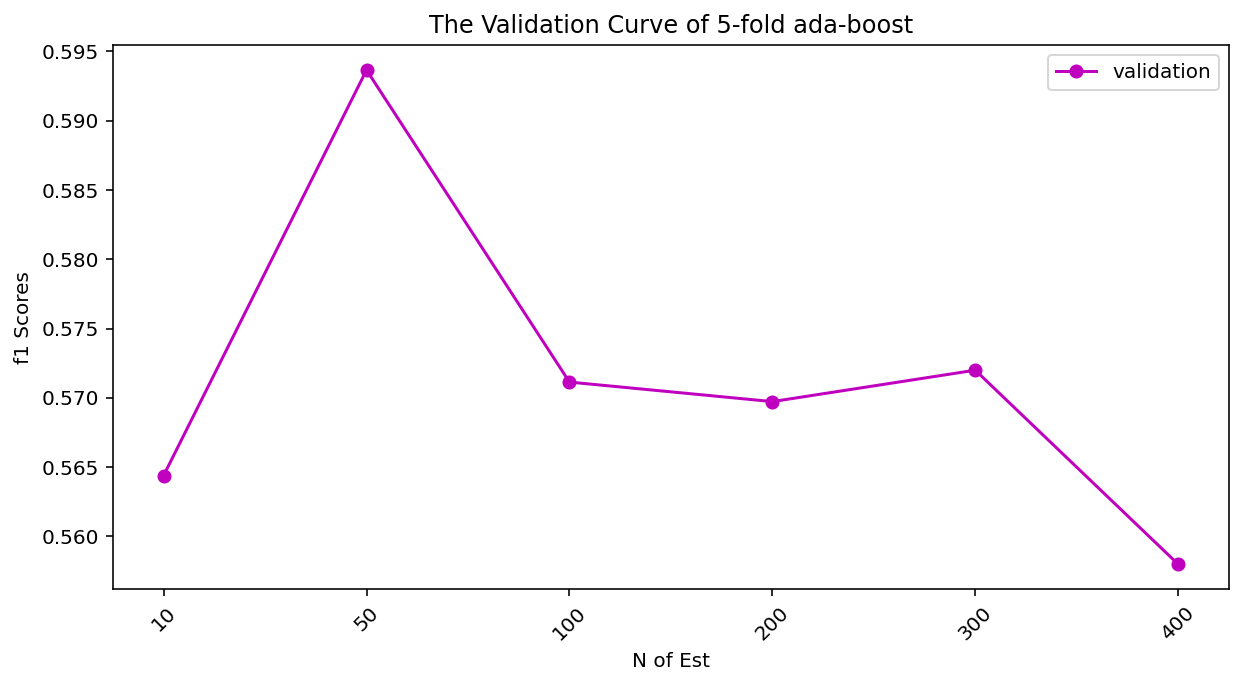

In [293]:
#Plotting the validation curve for the AB
plt.figure(figsize=(10,5))
plt.title("The Validation Curve of 5-fold ada-boost")
plt.plot(acc_valid, 'mo-',label = 'validation')
plt.xticks(np.arange(len(Est_list)), Est_list, rotation = 45)
plt.xlabel('N of Est')
plt.ylabel('f1 Scores')
plt.legend()
plt.show()

50 is considered to be the number of estimators 

In [294]:
#Performing the grid search
L_rate_list = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0]
Est_list = [10, 50, 100, 200, 300, 400]
params = {'n_estimators': Est_list,
         'learning_rate': L_rate_list, 'random_state': [42]}
ada_bst = AdaBoostClassifier()
#Grid Search
grid = GridSearchCV(estimator=ada_bst, param_grid=params, cv=5, verbose =1, scoring="f1", n_jobs=-1)

In [295]:
#Fitting the grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5,
                                           1.0],
                         'n_estimators': [10, 50, 100, 200, 300, 400],
                         'random_state': [42]},
             scoring='f1', verbose=1)

In [296]:
grid.best_params_

{'learning_rate': 0.001, 'n_estimators': 200, 'random_state': 42}

In [297]:
grid.best_estimator_

AdaBoostClassifier(learning_rate=0.001, n_estimators=200, random_state=42)

In [298]:
#Selecting the best parameters from Grid Search
ada_bst = AdaBoostClassifier(learning_rate=0.001, n_estimators=200, random_state = 42)
ada_bst.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.001, n_estimators=200, random_state=42)

In [299]:
#Getting the Accuracy for Train and Test
pred_train = ada_bst.predict(X_train)
print("Accuracy Scores for Train: ",metrics.accuracy_score(y_true = y_train, y_pred = pred_train))
pred = ada_bst.predict(X_val)
print("Accuracy Scores for Test: ",metrics.accuracy_score(y_true = y_val, y_pred = pred))

Accuracy Scores for Train:  0.5721476510067114
Accuracy Scores for Test:  0.5536912751677853


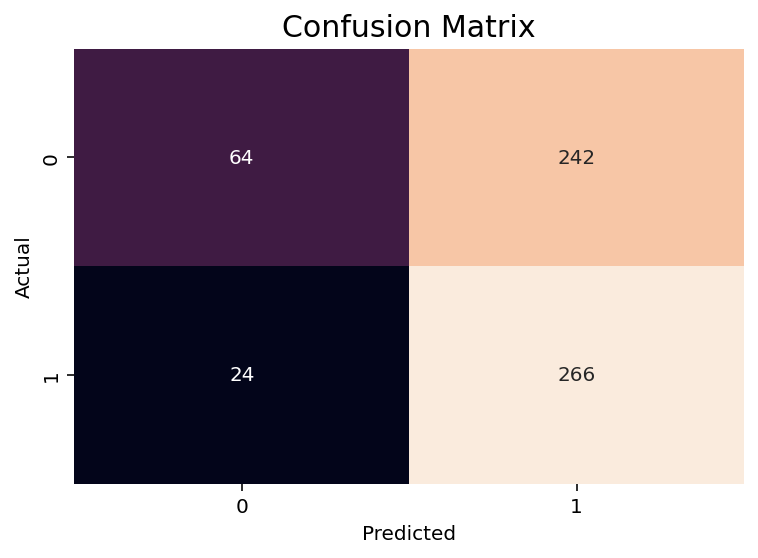

              precision    recall  f1-score   support

           0       0.73      0.21      0.32       306
           1       0.52      0.92      0.67       290

    accuracy                           0.55       596
   macro avg       0.63      0.56      0.50       596
weighted avg       0.63      0.55      0.49       596


Performance Metrics:
Sensitivity 0.917241
Specificity 0.209150
Precision 0.523622
Accuracy 0.553691
F1-score 0.666667


In [300]:
#Calculating the performance metrics and also plotting the confusion matrix 
#Creating the confusion matrix
conf_mat = pd.crosstab(index=np.ravel(y_val), columns=pred.ravel(), rownames=['Actual'], colnames=['Predicted'])
#Using the seaborn fn for the heatmap
sns.heatmap(conf_mat, annot=True, square=False, fmt='', cbar=False)
#Title
plt.title("Confusion Matrix", fontsize = 15)
#Plotting the confusion matrix
plt.show()
ada_bst_met = metrics.classification_report(y_true = y_val, y_pred = pred,  output_dict=True)
print(metrics.classification_report(y_true = y_val, y_pred = pred))
#Calculating the performance metrics
print("\nPerformance Metrics:")
#Sensitivity
print("Sensitivity %f"%(ada_bst_met['1']['recall']))
#Specificity
print("Specificity %f"%(ada_bst_met['0']['recall']))
#Precision
print("Precision %f"%(ada_bst_met['1']['precision']))
#Accuracy
print("Accuracy %f"%(ada_bst_met['accuracy']))
#F1-score
print("F1-score %f"%(ada_bst_met['1']['f1-score']))

Comparing the both the new model and the default model, we can see that the new model is good in predicting only one class with F1-score being higher. But, the default performs good in predicting both the class 0 and 1 with higher performance in the Recall, Precision, and Accuracy.

# Q7

## Gradient Boosting Machine

1. Default Gradient Boosting classifier:
    - Initiate the Gradient Boosting classifier from the sklearn library. Keep all parameters with their default values. (No need to specify anything)
    - Fit the model
    - Make predictions
    - Calculate accuracy score. What are the **training** and **validation** accuracies of the model?
    - Create confusion matrix
    - Provide the performance metrics for the **validation** set.
    
    
2. Using the training data perform hyper-parameter tuning. Use an appropriate metric for scoring (f1 is generally good).
    - Perform grid search (`GridSearchCV`) where you check for `learning_rate`, and `n_estimators`.
        - Using the best model provide the performance metrics for the validation set.
        
3. Create a chart showing the feature importances based on the best model obtained.

In [301]:
from sklearn.ensemble import GradientBoostingClassifier

In [302]:
# YOUR CODE
grd_bst = GradientBoostingClassifier()
grd_bst.fit(X_train, y_train)

GradientBoostingClassifier()

In [303]:
#Calculating the accuracy for both the train and test
pred_train = grd_bst.predict(X_train)
print("Accuracy score for train:", metrics.accuracy_score(y_true = y_train, y_pred = pred_train))
pred = grd_bst.predict(X_val)
print("Accuracy score for test:", metrics.accuracy_score(y_true = y_val, y_pred = pred))

Accuracy score for train: 0.7986577181208053
Accuracy score for test: 0.6124161073825504


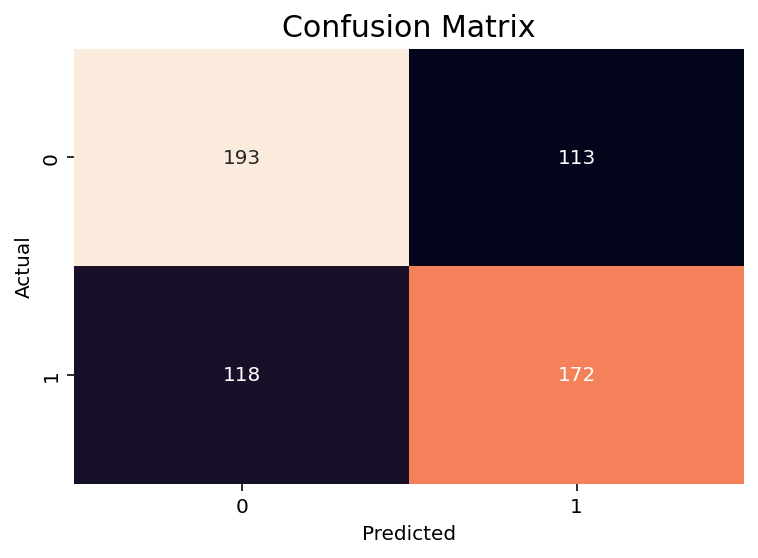

              precision    recall  f1-score   support

           0       0.62      0.63      0.63       306
           1       0.60      0.59      0.60       290

    accuracy                           0.61       596
   macro avg       0.61      0.61      0.61       596
weighted avg       0.61      0.61      0.61       596


Performance Metrics:
Sensitivity 0.593103
Specificity 0.630719
Precision 0.603509
Accuracy 0.612416
F1-score 0.598261


In [304]:
#Calculating the performance metrics and also plotting the confusion matrix 
#Creating the confusion matrix
conf_mat = pd.crosstab(index=np.ravel(y_val), columns=pred.ravel(), rownames=['Actual'], colnames=['Predicted'])
#Using the seaborn fn for the heatmap
sns.heatmap(conf_mat, annot=True, square=False, fmt='', cbar=False)
#Title
plt.title("Confusion Matrix", fontsize = 15)
#Plotting the confusion matrix
plt.show()
grd_bst_met = metrics.classification_report(y_true = y_val, y_pred = pred,  output_dict=True)
print(metrics.classification_report(y_true = y_val, y_pred = pred))
#Calculating the performance metrics
print("\nPerformance Metrics:")
#Sensitivity
print("Sensitivity %f"%(grd_bst_met['1']['recall']))
#Specificity
print("Specificity %f"%(grd_bst_met['0']['recall']))
#Precision
print("Precision %f"%(grd_bst_met['1']['precision']))
#Accuracy
print("Accuracy %f"%(grd_bst_met['accuracy']))
#F1-score
print("F1-score %f"%(grd_bst_met['1']['f1-score']))

In [305]:
#Calculating the Learning Rate
L_rate_list = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0]
#Creating an empty list to store the accuracy
acc_valid = []
for lr in L_rate_list:
    grd_bst = GradientBoostingClassifier(learning_rate=lr, random_state =42)
    grd_bst.fit(X_train, y_train)
    pred_train = grd_bst.predict(X_train)
    score_valid= cross_val_score(grd_bst,X_train, y_train, scoring = "f1", cv =5 )
    acc_valid.append(score_valid.mean())
print("F1 score: ")
acc_valid

F1 score: 


[0.3567783441930379,
 0.5143159419953276,
 0.5498872781996926,
 0.6125256142767597,
 0.6039150600584887,
 0.5551301382984576,
 0.5464266273850924]

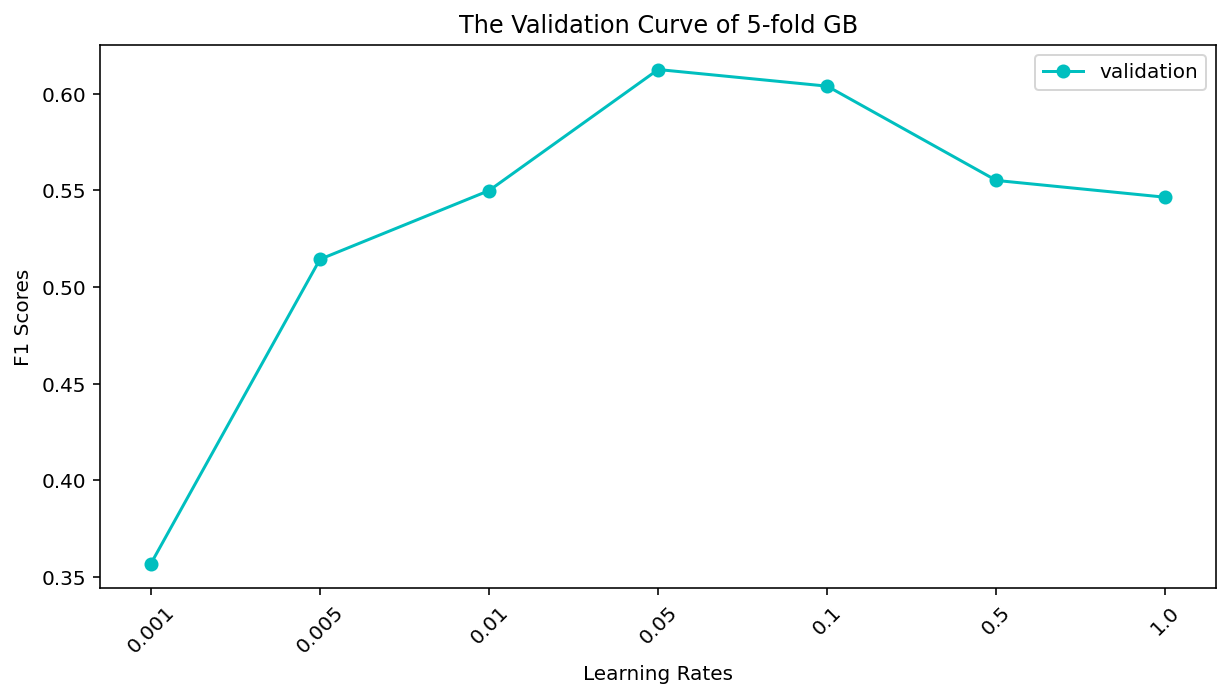

In [306]:
#Plotting the 5-fold for GB
plt.figure(figsize=(10,5))
#Title
plt.title("The Validation Curve of 5-fold GB")
plt.plot(acc_valid, 'co-',label = 'validation')
plt.xticks(np.arange(len(L_rate_list)), L_rate_list, rotation = 45)
plt.xlabel('Learning Rates')
plt.ylabel('F1 Scores')
plt.legend()
plt.show()

0.05 and 0.1 are considered to be the best learning rates

In [307]:
#Calculating the number of esstimates
Est_list = [10, 50, 100, 200, 300, 400]
#Creating an empty list to store the accuracy
acc_valid = []
for et in Est_list:
    grd_bst = GradientBoostingClassifier(n_estimators=et, random_state =42)
    grd_bst.fit(X_train, y_train)
    pred_train = grd_bst.predict(X_train)
    score_valid= cross_val_score(grd_bst,X_train, y_train, scoring = "f1", cv =5 )
    acc_valid.append(score_valid.mean())
print("F1 score")
acc_valid

F1 score


[0.5590649477652109,
 0.6003332004390167,
 0.6039150600584887,
 0.586261173822793,
 0.5864770795338629,
 0.5783960103369209]

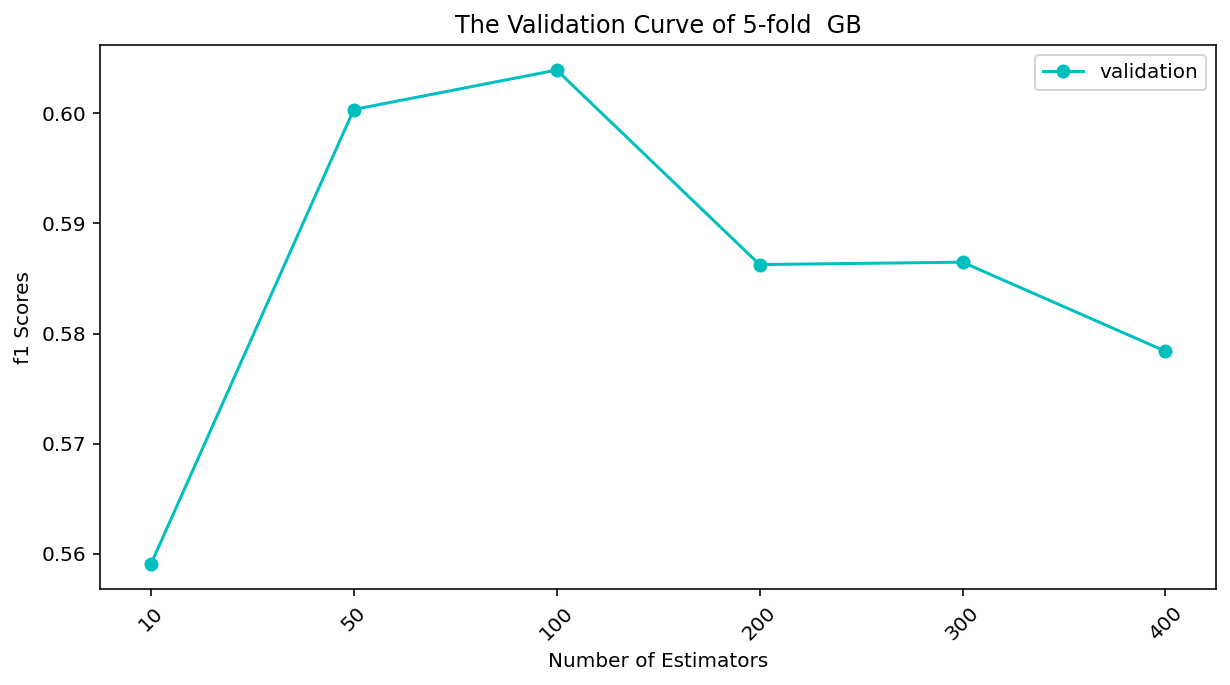

In [308]:
#Plotting the validation curve for the GB
plt.figure(figsize=(10,5))
plt.title("The Validation Curve of 5-fold  GB")
plt.plot(acc_valid, 'co-',label = 'validation')
plt.xticks(np.arange(len(Est_list)), Est_list, rotation = 45)
plt.xlabel('Number of Estimators')
plt.ylabel('f1 Scores')
plt.legend()
plt.show()

100 is considered to be the best number of estimators

In [309]:
#Performing grid search
L_rate_list = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0]
Est_list = [10, 50, 100, 200, 300, 400]
params = {'n_estimators': Est_list,
         'learning_rate': L_rate_list, 'random_state': [42]}
grd_bst = GradientBoostingClassifier()
#For f1 score
grid = GridSearchCV(estimator=grd_bst, param_grid=params, cv=5, verbose =1, scoring="f1", n_jobs=-1)

In [310]:
#Fitting the grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5,
                                           1.0],
                         'n_estimators': [10, 50, 100, 200, 300, 400],
                         'random_state': [42]},
             scoring='f1', verbose=1)

In [311]:
grid.best_params_

{'learning_rate': 0.05, 'n_estimators': 100, 'random_state': 42}

In [312]:
grid.best_estimator_

GradientBoostingClassifier(learning_rate=0.05, random_state=42)

In [313]:
#Performing the grid search on the best parameters
grd_bst = GradientBoostingClassifier(learning_rate=0.05, n_estimators=100, random_state =42)
#Fitting the grid search  
grd_bst.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, random_state=42)

In [314]:
#Calculating the accuracy score for both the train and test
pred_train = grd_bst.predict(X_train)
print("Accuracy Scores for train: ",metrics.accuracy_score(y_true = y_train, y_pred = pred_train))
pred = grd_bst.predict(X_val)
print("Accuracy Scores for test: ",metrics.accuracy_score(y_true = y_val, y_pred = pred))

Accuracy Scores for train:  0.7343400447427293
Accuracy Scores for test:  0.6040268456375839


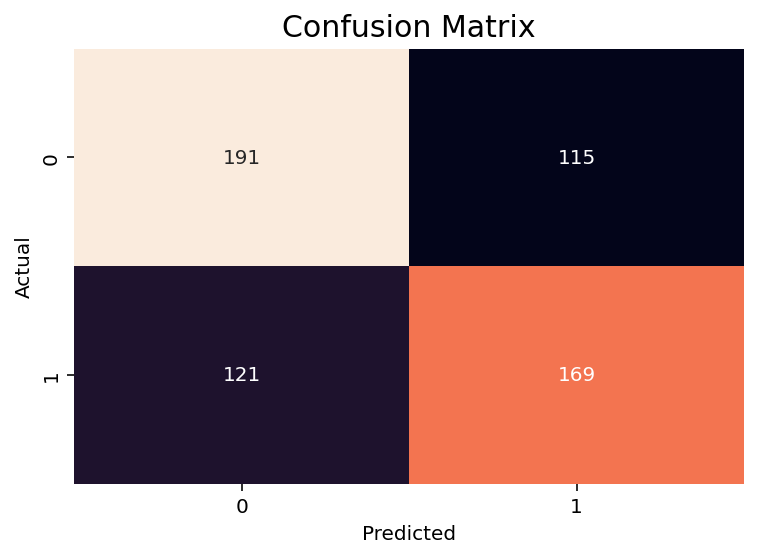

              precision    recall  f1-score   support

           0       0.61      0.62      0.62       306
           1       0.60      0.58      0.59       290

    accuracy                           0.60       596
   macro avg       0.60      0.60      0.60       596
weighted avg       0.60      0.60      0.60       596


Performance Metrics:
Sensitivity 0.582759
Specificity 0.624183
Precision 0.595070
Accuracy 0.604027
F1-score 0.588850


In [315]:
#Calculating the performance metrics and also plotting the confusion matrix 
#Creating the confusion matrix
conf_mat = pd.crosstab(index=np.ravel(y_val), columns=pred.ravel(), rownames=['Actual'], colnames=['Predicted'])
#Using the seaborn fn for the heatmap
sns.heatmap(conf_mat, annot=True, square=False, fmt='', cbar=False)
#Title
plt.title("Confusion Matrix", fontsize = 15)
#Plotting the confusion matrix
plt.show()
grd_bst_met = metrics.classification_report(y_true = y_val, y_pred = pred,  output_dict=True)
print(metrics.classification_report(y_true = y_val, y_pred = pred))
#Calculating the performance metrics
print("\nPerformance Metrics:")
#Sensitivity
print("Sensitivity %f"%(grd_bst_met['1']['recall']))
#Specificity
print("Specificity %f"%(grd_bst_met['0']['recall']))
#Precision
print("Precision %f"%(grd_bst_met['1']['precision']))
#Accuracy
print("Accuracy %f"%(grd_bst_met['accuracy']))
#F1-score
print("F1-score %f"%(grd_bst_met['1']['f1-score']))

From comparing the default model with the new model with the GridSearch we can see that the Default model is performing good in case of Accuracy, F1-Score, and Recall.

# Q8 (15 points)

- Using one or more of the Decision Tree, Random Forest, Adaboost, and Gradient Boosting classifer models:
    - Think of other ways of improving the recall and F1-score and list at least two possibilities.
    - Implement both of the methods you proposed. 
    - Is the model F1-score increasing?

There are three methods that can be used in solving the imbalance class and improve the recall and F1-score

In [316]:
#Printing the count of class 0 and 1 in the training data
#Calculating the proportion of class 1
#Checking if the dataset is balanced or imbalanced
print("class 0:", (y_train.values == 0).sum())
print("class 1:", (y_train.values == 1).sum())
print("propotion of class 1: " ,996/(996+4238))

class 0: 915
class 1: 873
propotion of class 1:  0.19029423003439053


# First method would be to increase the K in stratified K Fold and use the F1-score for GridSearchCV

Since the accuracy in the class 1 is weak via the GridSearch CV we should do the Stratified Cross-Validation with F1-score to improve the performance. We can acquire higher accuracy with the help of Stratified Cross-Validation with higher K folds and a 7-folds cross validation is done in order to find the best hyperparameter.

In [317]:
# YOUR CODE
strat_k_fold = StratifiedKFold(n_splits=7, random_state=None)
strat_k_fold.get_n_splits(X_train, y_train)

7

In [318]:
Max_Dpt_list = [ 5, 10, 15, 20, 30]
Min_Samp_list = [ 10,30, 50, 100, 200]
Est_list = [ 50,100,200, 400]
Lrn_Rte_list = [ 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]
#Performing gridsearch for hyperparameter for the DT
params_dec_tre = {'min_samples_split': Min_Samp_list, 'max_depth': Max_Dpt_list, 'random_state': [42]}
dec_tre = DecisionTreeClassifier()
grid_dec_tre= GridSearchCV(estimator=dec_tre, param_grid=params_dec_tre, scoring='f1', 
                           cv=strat_k_fold, verbose =1, n_jobs=-1)

In [319]:
#Performing gridsearch for hyperparameter for the RF 
params_rnd_frst = {'min_samples_split': Min_Samp_list, 'max_depth': Max_Dpt_list, 'n_estimators': Est_list, 
                   'random_state': [42]}
rnd_frst = RandomForestClassifier()
grid_rnd_frst= GridSearchCV(estimator=rnd_frst, param_grid=params_rnd_frst, scoring='f1',
                            cv=strat_k_fold, verbose =1, n_jobs=-1)

In [320]:
#Performing gridsearch for hyperparameter for the AB 
params_ada_bst = {'learning_rate': Lrn_Rte_list,'n_estimators': Est_list, 'random_state': [42]}
ada_bst = AdaBoostClassifier()
grid_ada_bst= GridSearchCV(estimator=ada_bst, param_grid=params_ada_bst, scoring='f1', 
                           cv=strat_k_fold, verbose =1, n_jobs=-1)

In [321]:
#Performing gridsearch for hyperparameter for the GB
params_grd_bst = {'learning_rate': Lrn_Rte_list,'n_estimators': Est_list, 'random_state': [42]}
grd_bst = GradientBoostingClassifier()
grid_grd_bst= GridSearchCV(estimator=grd_bst, param_grid=params_grd_bst, scoring='f1', 
                           cv=strat_k_fold, verbose =1, n_jobs=-1)

In [322]:
#Fitting the DT
grid_dec_tre.fit(X_train, y_train)
#Fitting the RF
grid_rnd_frst.fit(X_train, y_train)
#Fitting the AB
grid_ada_bst.fit(X_train, y_train)
#Fitting the GB
grid_grd_bst.fit(X_train, y_train)

Fitting 7 folds for each of 25 candidates, totalling 175 fits
Fitting 7 folds for each of 100 candidates, totalling 700 fits
Fitting 7 folds for each of 24 candidates, totalling 168 fits
Fitting 7 folds for each of 24 candidates, totalling 168 fits


GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5],
                         'n_estimators': [50, 100, 200, 400],
                         'random_state': [42]},
             scoring='f1', verbose=1)

In [323]:
print(grid_dec_tre.best_params_)
print(grid_rnd_frst.best_params_)
print(grid_ada_bst.best_params_)
print(grid_grd_bst.best_params_)

{'max_depth': 15, 'min_samples_split': 200, 'random_state': 42}
{'max_depth': 15, 'min_samples_split': 100, 'n_estimators': 400, 'random_state': 42}
{'learning_rate': 0.001, 'n_estimators': 50, 'random_state': 42}
{'learning_rate': 0.01, 'n_estimators': 400, 'random_state': 42}


In [324]:
dec_tre = DecisionTreeClassifier(max_depth = 15, min_samples_split = 200, random_state =42)
rnd_frst = RandomForestClassifier(max_depth = 15, min_samples_split = 100, n_estimators= 400, random_state =42)
ada_bst = AdaBoostClassifier(learning_rate=0.001, n_estimators=50, random_state =42)
grd_bst = GradientBoostingClassifier(learning_rate=0.01, n_estimators=400, random_state =42)

In [325]:
def evaluateModel(name,clf, score):
    clf.fit(X_train, np.ravel(y_train))
    predicted = clf.predict(X_val)
    conf_mat =  pd.crosstab(index=np.ravel(y_val), columns=predicted.ravel(), rownames=['Expected'], colnames=['Predicted'])
    sns.heatmap(conf_mat, annot=True, square=False, fmt='', cbar=False)
    acc = np.round(metrics.accuracy_score(y_val , predicted),3)
#Plotting the name of the method with it's SKF
    plt.title(name + " " + " StratifiedKFold with " + score, fontsize = 15)
    plt.show()
    print (metrics.classification_report(y_val,predicted))

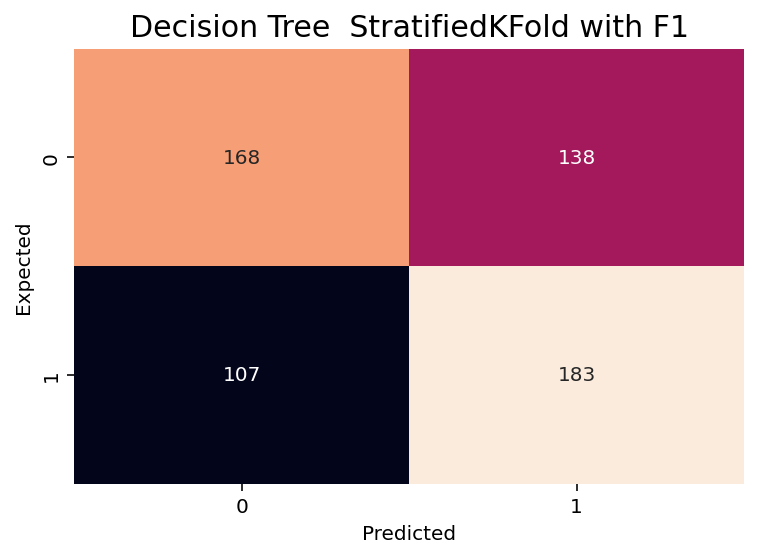

              precision    recall  f1-score   support

           0       0.61      0.55      0.58       306
           1       0.57      0.63      0.60       290

    accuracy                           0.59       596
   macro avg       0.59      0.59      0.59       596
weighted avg       0.59      0.59      0.59       596



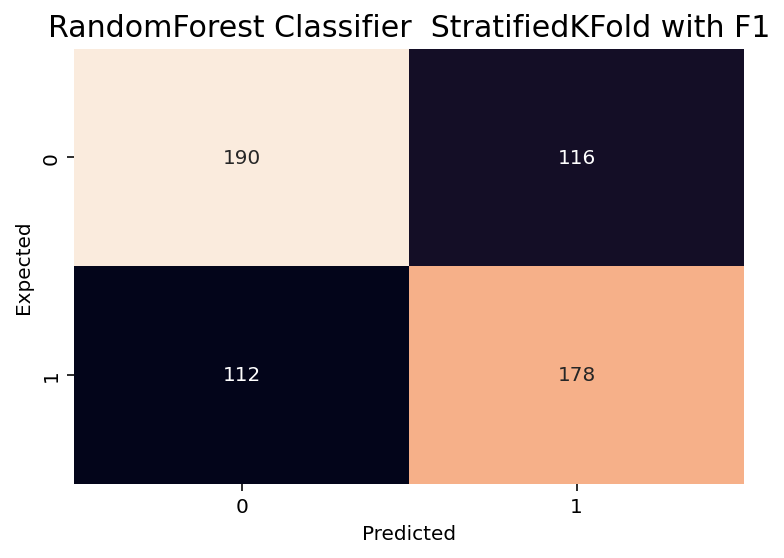

              precision    recall  f1-score   support

           0       0.63      0.62      0.62       306
           1       0.61      0.61      0.61       290

    accuracy                           0.62       596
   macro avg       0.62      0.62      0.62       596
weighted avg       0.62      0.62      0.62       596



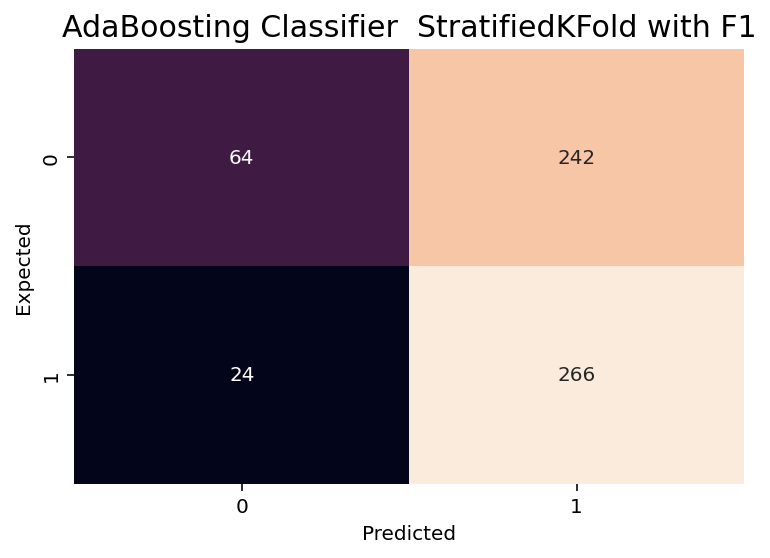

              precision    recall  f1-score   support

           0       0.73      0.21      0.32       306
           1       0.52      0.92      0.67       290

    accuracy                           0.55       596
   macro avg       0.63      0.56      0.50       596
weighted avg       0.63      0.55      0.49       596



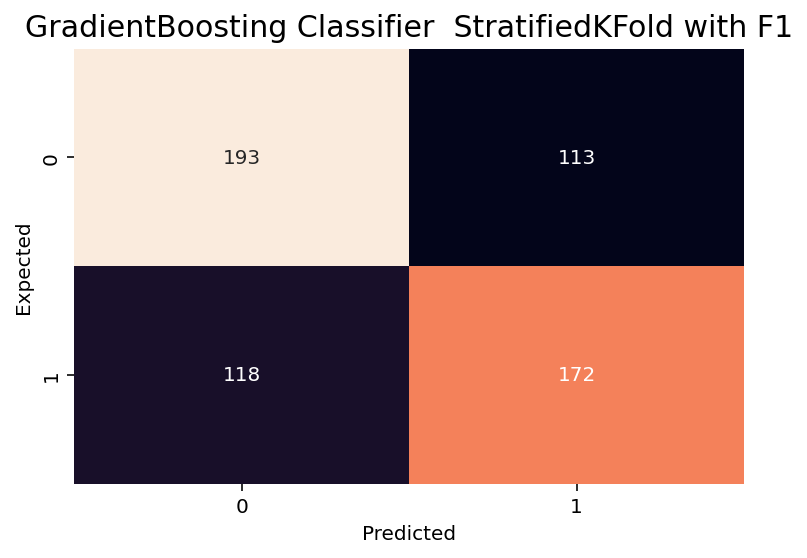

              precision    recall  f1-score   support

           0       0.62      0.63      0.63       306
           1       0.60      0.59      0.60       290

    accuracy                           0.61       596
   macro avg       0.61      0.61      0.61       596
weighted avg       0.61      0.61      0.61       596



In [326]:
#Classifiers aroung an array is created
names = ["Decision Tree", "RandomForest Classifier", "AdaBoosting Classifier", "GradientBoosting Classifier"]
classifiers= [dec_tre, rnd_frst, ada_bst, grd_bst]
#The classifiers are called in a loop
for name, clf in zip(names, classifiers):
    evaluateModel(name,clf, score='F1')

When in comparison, we can see that the accuracy rate is being higher with this method of Stratified Cross Validation as the F1 score is higher and as well as the recall of the new models are also higher in comparison with the model that does not use the Stratified CV and F1 scoring. However, the Gradient Boosting shows the same result.

# Second method would be to use the Stratified K Fold with Recall 

In [327]:
strat_k_fold = StratifiedKFold(n_splits=7, random_state=None)
strat_k_fold.get_n_splits(X_train, y_train)

7

In [328]:
Max_Dpt_list = [ 5, 10, 15, 20, 30]
Min_Samp_list = [ 10,30, 50, 100, 200]
Est_list = [ 50,100,200, 400]
Lrn_Rte_list = [ 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]
#Performing gridsearch for hyperparameter for the DT
params_dec_tre = {'min_samples_split': Min_Samp_list, 'max_depth': Max_Dpt_list, 'random_state': [42]}
dec_tre = DecisionTreeClassifier()
grid_dec_tre= GridSearchCV(estimator=dec_tre, param_grid=params_dec_tre, scoring='recall', 
                           cv=strat_k_fold, verbose =1, n_jobs=-1)

In [329]:
#Performing gridsearch for hyperparameter for the RF 
params_rnd_frst = {'min_samples_split': Min_Samp_list, 'max_depth': Max_Dpt_list, 'n_estimators': Est_list, 
                   'random_state': [42]}
rnd_frst = RandomForestClassifier()
grid_rnd_frst= GridSearchCV(estimator=rnd_frst, param_grid=params_rnd_frst, scoring='recall',
                            cv=strat_k_fold, verbose =1, n_jobs=-1)

In [330]:
#Performing gridsearch for hyperparameter for the AB 
params_ada_bst = {'learning_rate': Lrn_Rte_list,'n_estimators': Est_list, 'random_state': [42]}
ada_bst = AdaBoostClassifier()
grid_ada_bst= GridSearchCV(estimator=ada_bst, param_grid=params_ada_bst, scoring='recall', 
                           cv=strat_k_fold, verbose =1, n_jobs=-1)

In [331]:
#Performing gridsearch for hyperparameter for the GB
params_grd_bst = {'learning_rate': Lrn_Rte_list,'n_estimators': Est_list, 'random_state': [42]}
grd_bst = GradientBoostingClassifier()
grid_grd_bst= GridSearchCV(estimator=grd_bst, param_grid=params_grd_bst, scoring='recall', 
                           cv=strat_k_fold, verbose =1, n_jobs=-1)

In [332]:
#Fitting the DT
grid_dec_tre.fit(X_train, y_train)
#Fitting the RF
grid_rnd_frst.fit(X_train, y_train)
#Fitting the AB
grid_ada_bst.fit(X_train, y_train)
#Fitting the GB
grid_grd_bst.fit(X_train, y_train)

Fitting 7 folds for each of 25 candidates, totalling 175 fits
Fitting 7 folds for each of 100 candidates, totalling 700 fits
Fitting 7 folds for each of 24 candidates, totalling 168 fits
Fitting 7 folds for each of 24 candidates, totalling 168 fits


GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5],
                         'n_estimators': [50, 100, 200, 400],
                         'random_state': [42]},
             scoring='recall', verbose=1)

In [333]:
print(grid_dec_tre.best_params_)
print(grid_rnd_frst.best_params_)
print(grid_ada_bst.best_params_)
print(grid_grd_bst.best_params_)

{'max_depth': 15, 'min_samples_split': 200, 'random_state': 42}
{'max_depth': 15, 'min_samples_split': 50, 'n_estimators': 50, 'random_state': 42}
{'learning_rate': 0.001, 'n_estimators': 50, 'random_state': 42}
{'learning_rate': 0.1, 'n_estimators': 50, 'random_state': 42}


In [334]:
dec_tre = DecisionTreeClassifier(max_depth = 15, min_samples_split = 200, random_state =42)
rnd_frst = RandomForestClassifier(max_depth = 15, min_samples_split = 50, n_estimators= 50, random_state =42)
ada_bst = AdaBoostClassifier(learning_rate=0.001, n_estimators=50, random_state =42)
grd_bst = GradientBoostingClassifier(learning_rate=0.1, n_estimators=50, random_state =42)

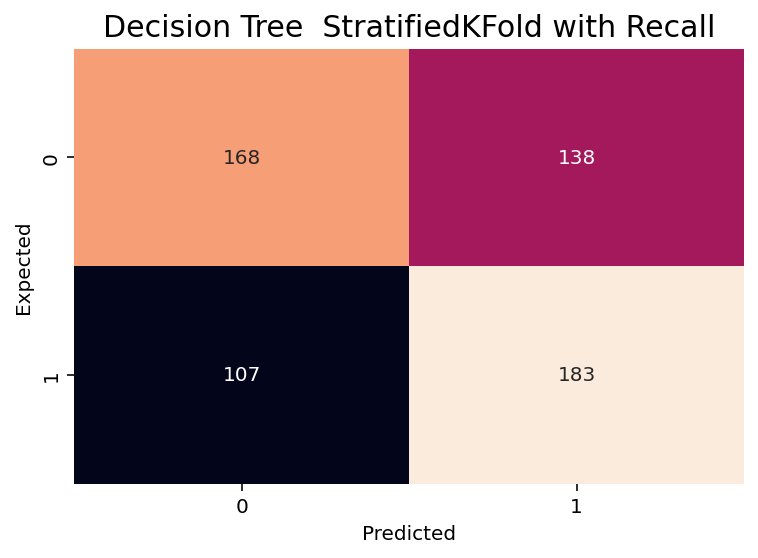

              precision    recall  f1-score   support

           0       0.61      0.55      0.58       306
           1       0.57      0.63      0.60       290

    accuracy                           0.59       596
   macro avg       0.59      0.59      0.59       596
weighted avg       0.59      0.59      0.59       596



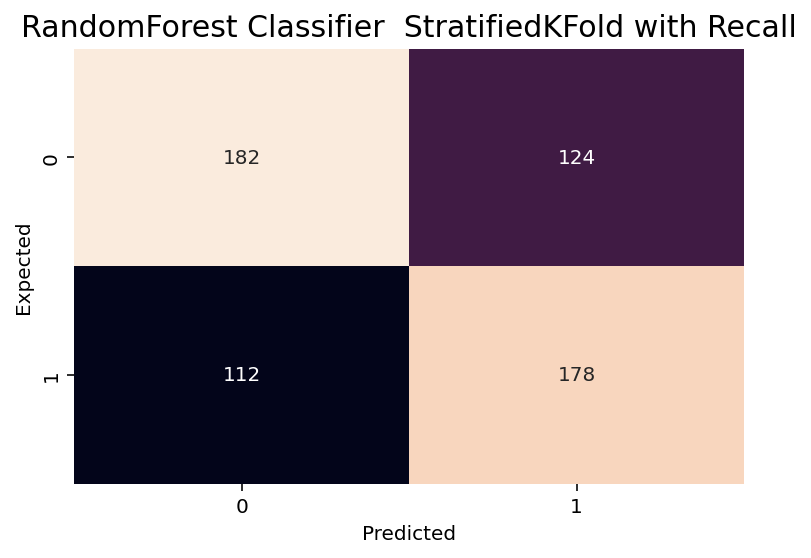

              precision    recall  f1-score   support

           0       0.62      0.59      0.61       306
           1       0.59      0.61      0.60       290

    accuracy                           0.60       596
   macro avg       0.60      0.60      0.60       596
weighted avg       0.60      0.60      0.60       596



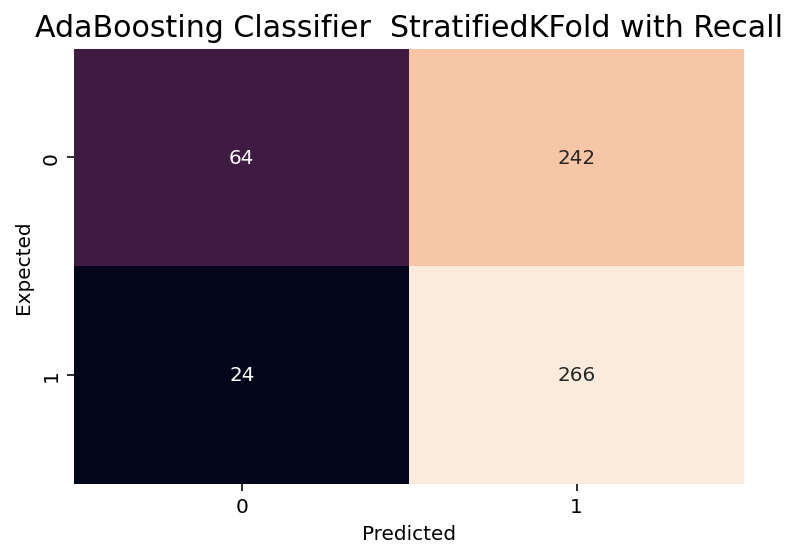

              precision    recall  f1-score   support

           0       0.73      0.21      0.32       306
           1       0.52      0.92      0.67       290

    accuracy                           0.55       596
   macro avg       0.63      0.56      0.50       596
weighted avg       0.63      0.55      0.49       596



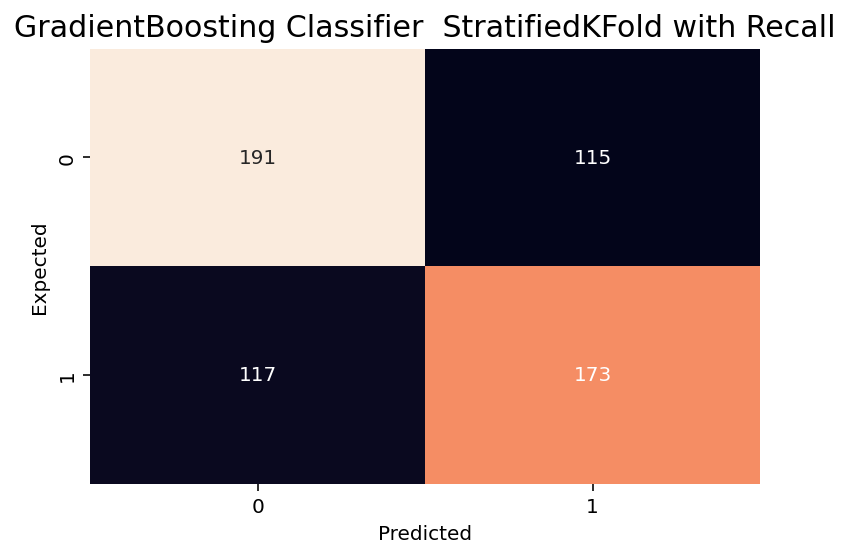

              precision    recall  f1-score   support

           0       0.62      0.62      0.62       306
           1       0.60      0.60      0.60       290

    accuracy                           0.61       596
   macro avg       0.61      0.61      0.61       596
weighted avg       0.61      0.61      0.61       596



In [335]:
#Classifiers aroung an array is created
names = ["Decision Tree", "RandomForest Classifier", "AdaBoosting Classifier", "GradientBoosting Classifier"]
classifiers= [dec_tre, rnd_frst, ada_bst, grd_bst]
#The classifiers are called in a loop
for name, clf in zip(names, classifiers):
    evaluateModel(name,clf, score='Recall')

We can see the results with using the Recall in the Stratified K Fold. So, in comparison we can see that the new model have increased it's accuracy in the F1, recall, and precision rates.

# Q9 (15 points)

- Choose the best fitted model for each of the classifiers (1 model for each of Decision Tree, Random Forest, Adaboost, and Gradient Boosting)
- Create a table summarizing results on the **test set**:
    - Create confusion matrix for each model
    - Provide the performance metrics on the test set for each model.

Which one is the winner among all?

In [336]:
# YOUR CODE
dec_tre = DecisionTreeClassifier(max_depth = 15, min_samples_split = 200, random_state =42)
rnd_frst = RandomForestClassifier(max_depth = 15, min_samples_split = 50, n_estimators= 50, random_state =42)
ada_bst = AdaBoostClassifier(learning_rate=0.001, n_estimators=50, random_state =42)
grd_bst = GradientBoostingClassifier(learning_rate=0.1, n_estimators=50, random_state =42)

In [337]:
#Showing the results
def evaluateBestModel(name,clf):
    clf.fit(X_train, np.ravel(y_train))
    predicted = clf.predict(X_val)
    conf_mat =  pd.crosstab(index=np.ravel(y_val), columns=predicted.ravel(), rownames=['Expected'], colnames=['Predicted'])
    sns.heatmap(conf_mat, annot=True, square=False, fmt='', cbar=False)
    acc = np.round(metrics.accuracy_score(y_val , predicted),3)
    plt.title(name + " " , fontsize = 15)
    plt.show()
    print (metrics.classification_report(y_val,predicted))
    met = metrics.classification_report(y_val,predicted,output_dict=True)
    print("\nPerformance Metrics:")
#Sensitivity
    print("Sensitivity %f"%(met['1']['recall']))
#Specificity
    print("Specificity %f"%(met['0']['recall']))
#Precision
    print("Precision %f"%(met['1']['precision']))
#Accuracy
    print("Accuracy %f"%(met['accuracy']))
#f1-score
    print("F1-score %f"%(met['1']['f1-score']))

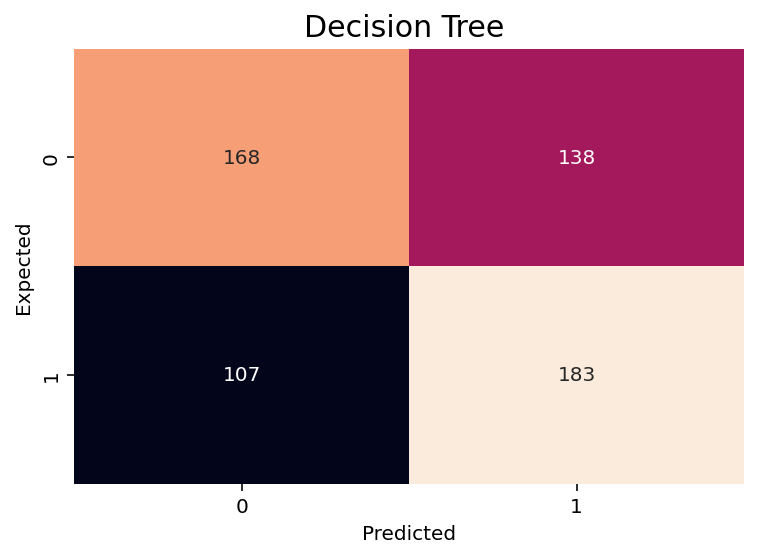

              precision    recall  f1-score   support

           0       0.61      0.55      0.58       306
           1       0.57      0.63      0.60       290

    accuracy                           0.59       596
   macro avg       0.59      0.59      0.59       596
weighted avg       0.59      0.59      0.59       596


Performance Metrics:
Sensitivity 0.631034
Specificity 0.549020
Precision 0.570093
Accuracy 0.588926
F1-score 0.599018


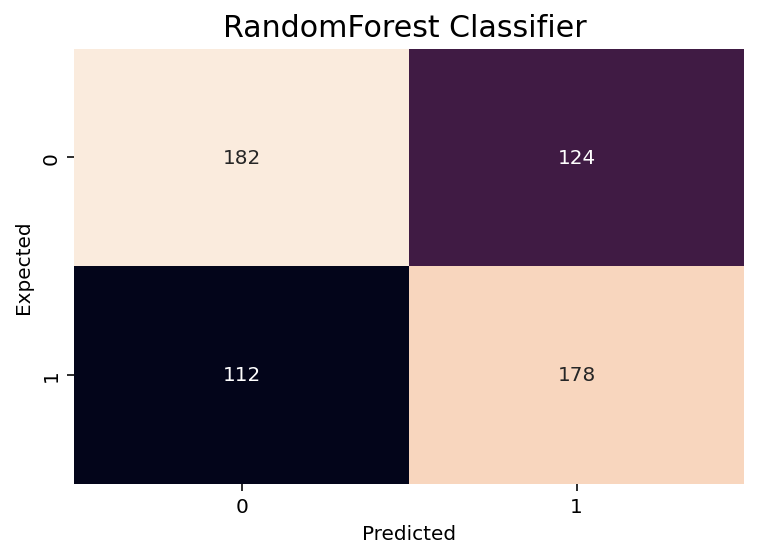

              precision    recall  f1-score   support

           0       0.62      0.59      0.61       306
           1       0.59      0.61      0.60       290

    accuracy                           0.60       596
   macro avg       0.60      0.60      0.60       596
weighted avg       0.60      0.60      0.60       596


Performance Metrics:
Sensitivity 0.613793
Specificity 0.594771
Precision 0.589404
Accuracy 0.604027
F1-score 0.601351


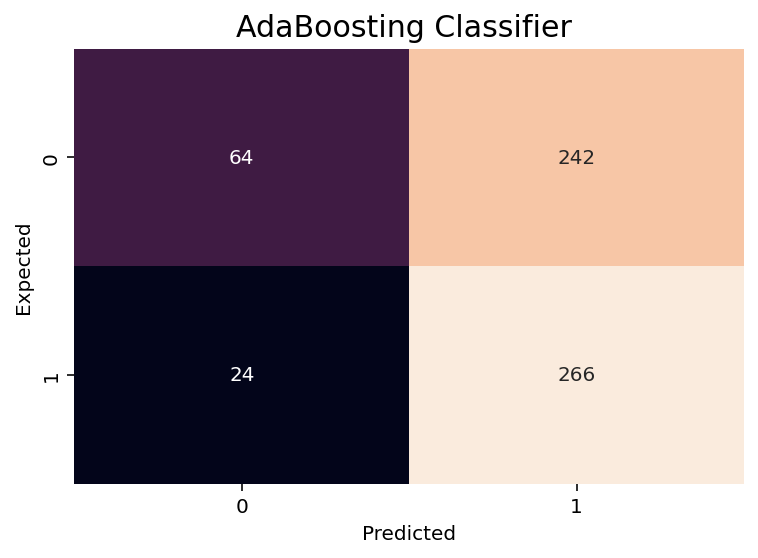

              precision    recall  f1-score   support

           0       0.73      0.21      0.32       306
           1       0.52      0.92      0.67       290

    accuracy                           0.55       596
   macro avg       0.63      0.56      0.50       596
weighted avg       0.63      0.55      0.49       596


Performance Metrics:
Sensitivity 0.917241
Specificity 0.209150
Precision 0.523622
Accuracy 0.553691
F1-score 0.666667


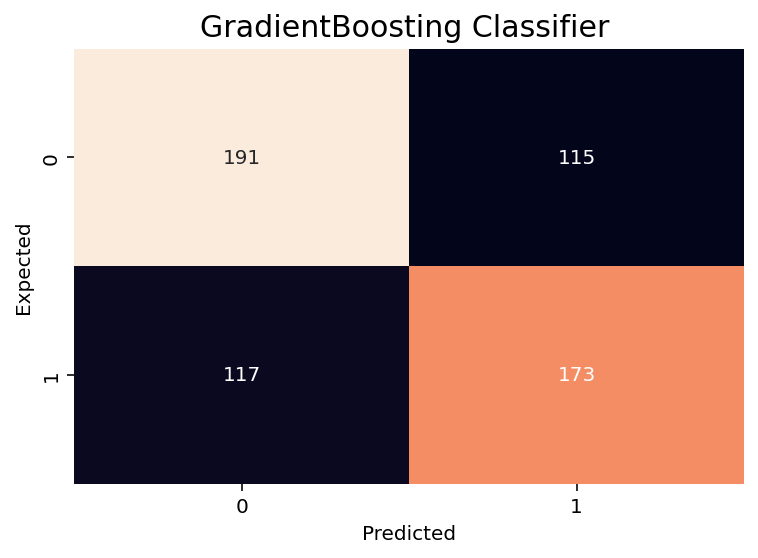

              precision    recall  f1-score   support

           0       0.62      0.62      0.62       306
           1       0.60      0.60      0.60       290

    accuracy                           0.61       596
   macro avg       0.61      0.61      0.61       596
weighted avg       0.61      0.61      0.61       596


Performance Metrics:
Sensitivity 0.596552
Specificity 0.624183
Precision 0.600694
Accuracy 0.610738
F1-score 0.598616


In [338]:
#Classifiers aroung an array is created
names = ["Decision Tree", "RandomForest Classifier", "AdaBoosting Classifier", "GradientBoosting Classifier"]
classifiers= [dec_tre, rnd_frst, ada_bst, grd_bst]
#The classifiers are called in a loop
for name, clf in zip(names, classifiers):
    evaluateBestModel(name,clf)

All the new models here has a better accuracy, F1, and precision and furthermore from these models we can say that the GradientBoosting Classifier is considered to be having higher recall, precision in predicting between both the class 0 and class 1.

The winner model would be the Gradient Boosting Classifier
GradientBoostingClassifier(learning_rate=0.1, n_estimators=50, random_state =42)

# Great Job!